<a href="https://colab.research.google.com/github/DianaGarcesPortilla/Machine_Learning/blob/main/Aprendizaje__supervisado_y__no_supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Introducción**

Desde mediados de febrero de 2017 a abril del 2018 en el departamento de Santander Colombia se llevó a cabo un estudio de turismo receptor, es decir, estudiar el flujo de visitantes que llegan a Santander, con el objetivo de caracterizarlo en función de las variables propuestas por Organización Mundial de Turismo para la medición del turismo receptor que comprenden: el motivo principal del viaje,las noches de estancia, el tamaño del grupo de viaje, el transporte utilizado y el gasto turístico. Adicionalmente se contemplaron características demográficas como lugar de residencia, género y edad.

Antes de exponer los objetivos del análisis supervisados y no supervisado se aclaran dos conceptos importantes sobre el turismo receptor:

**Visitante:** Un visitante es una persona que viaja a un destino principal distinto al de su entorno habitual, por una duración inferior a un año, con cualquier finalidad principal (ocio, negocios u
otro motivo personal) que no sea la de ser empleado por una entidad residente en el país o lugar visitados.

**Gasto turístico:** Hace referencia a la suma pagada por la adquisición de bienes y servicios de consumo y de objetos valiosos para uso propio o para regalar, antes y durante los viajes turísticos. Incluye los gastos incurridos por los propios visitantes, así como los gastos pagados o reembolsados por otros.

Para la aplicación de las técnicas de análisis supervisado se propone como variable respuesta el gasto turístico en función de las covariables: género, edad, lugar de residencia, motivo principal del viaje, número de municipios visitados, actividades realizadas, el transporte utilizado para llegar y movilizarse durante la estancia, el tamaño del grupo de viaje y el nivel de satisfacción.

En función de los hallazgos del estudio exploratorio se propone el uso de los modelos de regresión, KNN y Radom Forest, para el análisis supervisado.

Posteriormente para el el uso del método de aprendizaje no supervisado se aplica k-prototype, por la presencia de variables mixtas.

Nota: la base de datos es confidencial


*World Tourism Organization (UNWTO).(2014). International Recommendations for Tourism Statistics 2008.

# **2. Objetivos**

2.1. Establecer la viabilidad de predecir el gasto turístico del visitante en función de las covariables mencionadas en la introducción.

2.2. Determinar si los visitantes receptores a Santander tienen un perfil único o se identifican diferentes perfiles o grupos de visitantes en función a las variables que caracterizan su viaje receptor.

# **3. Resultados**

| **Variables de estudio**                        | **tipo**   | **Columna en base de datos**                                                                                                                                                                                                                |
|-------------------------------------------------|------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 1. Lugar de residencia                          | categórica | Departamento_del_visitante                                                                                                                                                                                                                  |
| 2. Motivo principal del viaje                   | categórica | Motivo_principal_del_viaje                                                                                                                                                                                                                  |
| 3. Género                                       | categórica | Genero                                                                                                                                                                                                                                      |
| 4. Edad                                         | numérica   | Edad                                                                                                                                                                                                                                        |
| 5. Noches de estancia                           | numérica   | Noches_de_visita                                                                                                                                                                                                                            |
| 6. Número de municipios visitados               | numérica   | N_de_municipios_visitados                                                                                                                                                                                                                   |
| 7. Actividades turísticas realizadas            | categórica | Visitar_Parques_Sitios_Naturales; Actividades_Artisticas_culturales; Visitar_lugares_tematicos; Visitar_casinos_juegos_de_azar; Actividades_Relacionadas_Deporte; Actividades_Nocturnos; Compras; Actividades religionas; Negocios; ninguna |
| 8. Transporte utilizado para llegar a Santander | categórica | Transporte_usado_para_llegar                                                                                                                                                                                                                |
| 9. Transporte utiliado dentro del departamento  | categórica | Transporte_usado_dentro_del_departamento                                                                                                                                                                                                    |
| 10. Tamaño del grupo de viaje                   | numérica   | Turistas                                                                                                                                                                                                                                    |
| 11. Gasto turístico del visitante               | numérica   | Gasto_Total                                                                                                                                                                                                                                 |
| 12.Nivel de satisfacción                        | numérica   | Nivel_de_satisfaccio                                                                                                                                                                                                                        |
| 13.Alojamiento utilizado                        | categórica | Alojamiento_Utilizado                                                                                                                                                                                                                       |

In [ ]:
!pip install pickle5
!pip install pandas==1.5.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.1/132.1 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pickle5: filename=pickle5-0.0.11-cp310-cp310-linux_x86_64.whl size=255312 sha256=98cb0ea359772005b85977dbe36071e644d20b2a0ef9165b083bc34e471842e9
  Stored in directory: /root/.cache/pip/wheels/7d/14/ef/4aab19d27fa8e58772be5c71c16add0426acf9e1f64353235c
Successfully built pickle5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 25.8 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 1.5.2 which is incompatible.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle5 as pickle
from scipy import stats
import scipy.stats as sp


from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier


from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tools.eval_measures import rmse

from sklearn.linear_model import LinearRegression

 # "error", "ignore", "always", "default", "module" or "once"

## **3.1 Lectura y limpieza de datos**

Cargue de la base de datos a utilizar.

In [ ]:
path = '/content/turismo_receptorf.pickle'

with open(path, "rb") as dt:
  data = pickle.load(dt)

In [ ]:
data.columns

Index(['Departamento_del_visitante', 'Motivo_principal_del_viaje', 'Genero',
       'Edad', 'Noches_de_visita', 'N_de_municipios_visitados',
       'Actividades_Artisticas_culturales', 'Visitar_Parques_Sitios_Naturales',
       'Visitar_lugares_tematicos', 'Visitar_casinos_juegos_de_azar',
       'Actividades_Relacionadas_Deporte', 'Actividades_Nocturnos', 'Compras',
       'Actividades_religiosas', 'Negocios', 'Ninguna',
       'Transporte_usado_para_llegar',
       'Transporte_usado_dentro_del_departamento', 'Turistas', 'Gasto_Total',
       'Nivel_de_satisfaccio', 'A3_2_nombre_pais_esp', 'A3_1_nombre_dpto',
       'A3_1_nombre_ciudad', 'lugar_residencia_km', 'Alojamiento_Utilizado'],
      dtype='object')

In [ ]:
data['Departamento_del_visitante'] = data['Departamento_del_visitante'].astype('int64')
data['Motivo_principal_del_viaje'] = data['Motivo_principal_del_viaje'].astype('int64')
data['Genero'] = data['Genero'].astype('int64')
data['Actividades_Artisticas_culturales'] = data['Actividades_Artisticas_culturales'].astype('int64')
data['Visitar_Parques_Sitios_Naturales'] = data['Visitar_Parques_Sitios_Naturales'].astype('int64')
data['Visitar_lugares_tematicos'] = data['Visitar_lugares_tematicos'].astype('int64')
data['Visitar_casinos_juegos_de_azar'] = data['Visitar_casinos_juegos_de_azar'].astype('int64')
data['Actividades_Relacionadas_Deporte'] = data['Actividades_Relacionadas_Deporte'].astype('int64')
data['Actividades_Nocturnos'] = data['Actividades_Nocturnos'].astype('int64')
data['Compras'] = data['Compras'].astype('int64')
data['Actividades_religiosas'] = data['Actividades_religiosas'].astype('int64')
data['Negocios'] = data['Negocios'].astype('int64')
data['Ninguna'] = data['Ninguna'].astype('int64')
data['Transporte_usado_para_llegar'] = data['Transporte_usado_para_llegar'].astype('int64')
data['Transporte_usado_dentro_del_departamento'] = data['Transporte_usado_dentro_del_departamento'].astype('int64')
data['Alojamiento_Utilizado'] = data['Alojamiento_Utilizado'].astype('int64')

In [ ]:
data['Transporte_usado_para_llegar'].unique()

array([6, 1, 4, 3, 2, 5, 9])

In [ ]:
data.describe()

,Departamento_del_visitante,Motivo_principal_del_viaje,Genero,Edad,Noches_de_visita,N_de_municipios_visitados,Actividades_Artisticas_culturales,Visitar_Parques_Sitios_Naturales,Visitar_lugares_tematicos,Visitar_casinos_juegos_de_azar,...,Compras,Actividades_religiosas,Negocios,Ninguna,Transporte_usado_para_llegar,Transporte_usado_dentro_del_departamento,Turistas,Gasto_Total,Nivel_de_satisfaccio,Alojamiento_Utilizado
count,5786.000000,5786.000000,5786.000000,5786.000000,5786.000000,5786.000000,5786.000000,5786.000000,5786.000000,5786.000000,...,5786.000000,5786.000000,5786.000000,5786.000000,5786.000000,5786.000000,5786.000000,5.786000e+03,5786.000000,5786.000000
mean,42.021777,1.704632,1.472693,36.487211,7.090045,2.830280,0.408572,0.904943,0.005358,0.010716,...,0.580366,0.003975,0.001728,0.030591,4.129969,4.183374,2.434151,1.091690e+06,8.914622,2.643104
std,39.052537,1.121196,0.499297,11.944973,17.279221,1.551386,0.491612,0.293319,0.073007,0.102969,...,0.493542,0.062928,0.041541,0.172222,2.069754,2.294122,2.489786,1.486295e+06,0.962191,3.543629
min,5.000000,1.000000,1.000000,16.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,5.000000e+03,1.000000,1.000000
25%,11.000000,1.000000,1.000000,28.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,3.500000e+05,8.000000,1.000000
50%,18.000000,1.000000,1.000000,34.000000,3.000000,3.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,6.000000,2.000000,6.500000e+05,9.000000,2.000000
75%,76.000000,2.000000,2.000000,43.000000,6.000000,4.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,6.000000,6.000000,3.000000,1.213750e+06,10.000000,2.000000
max,108.000000,7.000000,2.000000,85.000000,302.000000,10.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,9.000000,11.000000,77.000000,2.280000e+07,10.000000,17.000000


In [ ]:
data['Gasto_Total'].describe()

count    5.786000e+03
mean     1.091690e+06
std      1.486295e+06
min      5.000000e+03
25%      3.500000e+05
50%      6.500000e+05
75%      1.213750e+06
max      2.280000e+07
Name: Gasto_Total, dtype: float64

In [ ]:
data['Alojamiento_Utilizado'].unique()

array([ 1,  2, 16,  3, 11, 10,  9, 13,  5, 15, 17,  8, 12,  6,  7, 14,  4])

In [ ]:
#Revisar diferencia en tamaño del grupo de viaje
data['Turistas'].describe()

count    5786.000000
mean        2.434151
std         2.489786
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        77.000000
Name: Turistas, dtype: float64

In [ ]:
#Unificar 0 y 16 como 16
data['Alojamiento_Utilizado'].unique()

array([ 1,  2, 16,  3, 11, 10,  9, 13,  5, 15, 17,  8, 12,  6,  7, 14,  4])

In [ ]:
alojamiento=data[['Alojamiento_Utilizado']]
alojamiento[alojamiento['Alojamiento_Utilizado']==16].count()

Alojamiento_Utilizado    279
dtype: int64

In [ ]:
#Se reemplaza el valor 0 por 16=Ningún tipo de alojamiento
data['Alojamiento_Utilizado']= data['Alojamiento_Utilizado'].replace([0],16)

In [ ]:
data['Alojamiento_Utilizado'].unique()

array([ 1,  2, 16,  3, 11, 10,  9, 13,  5, 15, 17,  8, 12,  6,  7, 14,  4])

In [ ]:
data['Departamento_del_visitante'].unique()

array([ 15,  11,  54, 108,   5,  13,  25,  76,  47,   8,  18,  20,  41,
        73,  66,  50,  44,  17,  81,  27,  85,  86,  23,  70,  95,  19,
        63,  52,  88])

In [ ]:
#agrupar lugar de residencia extranjero en columna Departamento_del_visitante. Colocar el código 108 a todos los extranjeros
data['Departamento_del_visitante']= data['Departamento_del_visitante'].replace([109,110,116,119,122,133,139
,143,145,147,149,151,153,154,155,163,165,173,182,189,191,195,196,197,200,205,215,227,239,240,241,246,247,
252,258,260,261,264,268,271,272,291,297,301,304,305,312,315,323,329,332,334,339,],108)

In [ ]:
data.to_pickle("turismoreceptorf1.pickle")

In [ ]:
data['Departamento_del_visitante'].unique()

array([ 15,  11,  54, 108,   5,  13,  25,  76,  47,   8,  18,  20,  41,
        73,  66,  50,  44,  17,  81,  27,  85,  86,  23,  70,  95,  19,
        63,  52,  88])

# **3.2 Análisis exploratorio**


* El gasto turístico por visitante presenta una distribución sesgada
a la derecha (asimetria: 4.92 ), con gran concentración a la media de \$1.091.689 (curtosis: 38.73) y  mediana  de $650.000

* Los viajeros que visitan Santander provienen principalmente de los departamentos Colombia: Bogotá D.C (29%), Antioquia (9%), Norte Santander(7%), Cesár(5%) y un grupo que representa todas las divisiones administrativas de otros países definido como Extranjeros (19%).

* Los visitantes que vienen a Santander lo hacen predominantemente por vacaciones, recreo y ocio (58%) y visita a familiares y/o amigos (30%).

* Con relación a las características demográficas, las edades de los visitantes tiene una distribución normal y media de 36 años. No existe diferencia significativa en el género (femenino: 53%, Masculino: 47%).

* La moda de la estancia en el departamento son tres noches. Además, el 63% de los visitantes están en Santander entre 1 a 4 noches.

* El 70% de los visitantes recorre tres municipios del departamento.
* Las actividades turísticas que realizan la mayoría de los visitantes son: visita a parques y/o sitios naturales (90%), visita a centros comerciales y/o compra fuera de estos (58%) y asistencia a espectáculos artísticos y/culturales (41%).

* El 47% de los visitantes se moviliza en transporte terrestre de pasajeros y el 26% en vehículo propio. Es decir que el 73% de los visitantes se moviliza por carretera.  

* Los medios de transporte más relevantes para movilizarse por el departamento son: Transporte terrestre de pasajeros (59%) y vehículo propio (27%).

* El tamaño promedio del grupo de viaje son 2 personas.

* EL 95% de los visitantes se encuentran satisfechos con su viaje a Santander (valoraciones del 8 al 10).

* Los visitantes se hospedan en hotel (50%) o en casa de familiares o amigos (39%)

* No se evidencia diferencia significativa en el comportamiento del gasto turístico entre categorías de las variables nominales de estudio y adicionalmente, no existe una tendencia marcada entre gasto turístico y las covariables numéricas.


**Gráficos univariados**

Media: 1091689.5874524715
Mediana: 650000.0
Asimetria: 4.923628365981918
Curtosis: 38.73497025436238


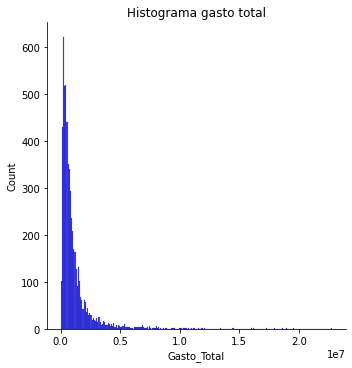

In [ ]:
#Histograma Gasto total
sns.displot(data.Gasto_Total, color="blue").set(title = 'Histograma gasto total')

print('Media:',np.mean(data['Gasto_Total']))
print('Mediana:',np.median(data['Gasto_Total']))
print('Asimetria:',sp.skew(data['Gasto_Total']))
print('Curtosis:',sp.kurtosis(data['Gasto_Total']))

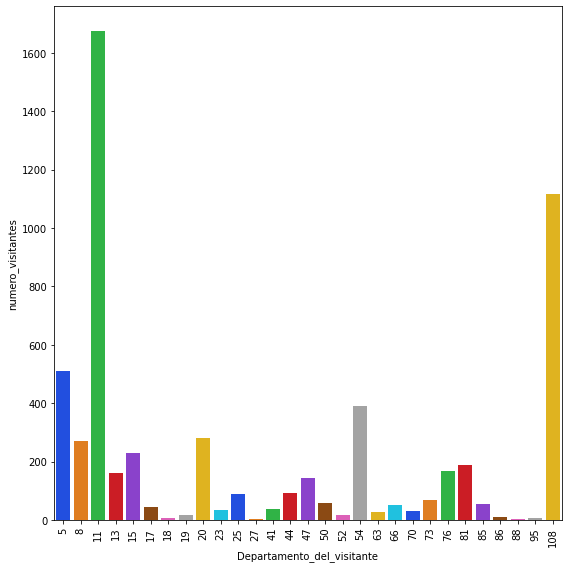

In [ ]:
#gráfica de barras departamento del visitante

#tabla de frecuencias de departamento del visitante
pv_dpto=pd.pivot_table(data,index='Departamento_del_visitante',values=['A3_1_nombre_dpto'],aggfunc='count')
df_dpto_frecuencia=pv_dpto.rename(columns={'A3_1_nombre_dpto':'numero_visitantes'}).reset_index()
df_dpto_frecuencia_orden=df_dpto_frecuencia.sort_values('numero_visitantes',ascending=False)


fig, ax = plt.subplots(figsize=(8,8))
sns.barplot(x=df_dpto_frecuencia_orden['Departamento_del_visitante'], y=df_dpto_frecuencia_orden['numero_visitantes'], ax=ax, data=df_dpto_frecuencia_orden,  palette='bright')

#Orientación de las categorias del eje x
plt.xticks(rotation = 90)

fig.tight_layout();

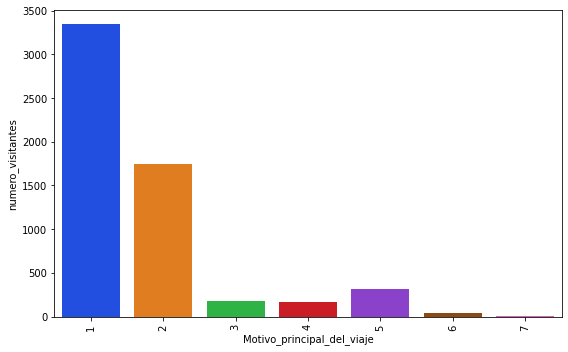

In [ ]:
#gráfica de barras motivo principal del viaje

#tabla de frecuencias motivo principal del viaje
pv_motivo=pd.pivot_table(data,index='Motivo_principal_del_viaje',values=['A3_1_nombre_dpto'],aggfunc='count')
df_motivo_frecuencia=pv_motivo.rename(columns={'A3_1_nombre_dpto':'numero_visitantes'}).reset_index()
df_motivo_frecuencia_orden=df_motivo_frecuencia.sort_values('numero_visitantes',ascending=False)

fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(x=df_motivo_frecuencia_orden['Motivo_principal_del_viaje'], y=df_motivo_frecuencia_orden['numero_visitantes'], ax=ax, data=df_motivo_frecuencia_orden,  palette='bright')

#Orientación de las categorias del eje x
plt.xticks(rotation = 90)

fig.tight_layout();


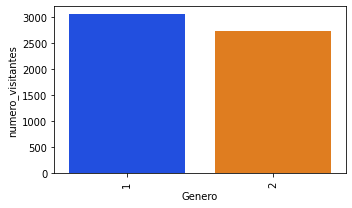

In [ ]:
#gráfica de barras género

#Tabla de frecuencias genero
pv_genero=pd.pivot_table(data,index='Genero',values=['A3_1_nombre_dpto'],aggfunc='count')
df_genero_frecuencia=pv_genero.rename(columns={'A3_1_nombre_dpto':'numero_visitantes'}).reset_index()
df_genero_frecuencia_orden=df_genero_frecuencia.sort_values('numero_visitantes',ascending=False)

fig, ax = plt.subplots(figsize=(5,3))
sns.barplot(x=df_genero_frecuencia_orden['Genero'], y=df_genero_frecuencia_orden['numero_visitantes'], ax=ax, data=df_genero_frecuencia_orden,  palette='bright')

#Orientación de las categorias del eje x
plt.xticks(rotation = 90)

fig.tight_layout();

Media: 36.487210508123056
Mediana: 34.0
Asimetria: 0.9149322459067243
Curtosis: 0.4247025915221383


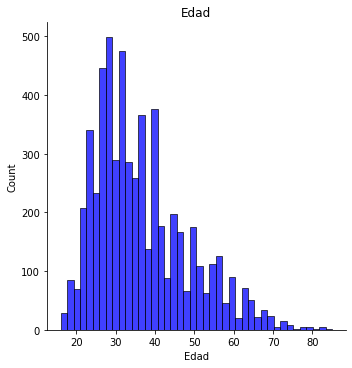

In [ ]:
#Histograma edad
sns.displot(data.Edad, color="blue").set(title = 'Edad')

print('Media:',np.mean(data['Edad']))
print('Mediana:',np.median(data['Edad']))
print('Asimetria:',sp.skew(data['Edad']))
print('Curtosis:',sp.kurtosis(data['Edad']))

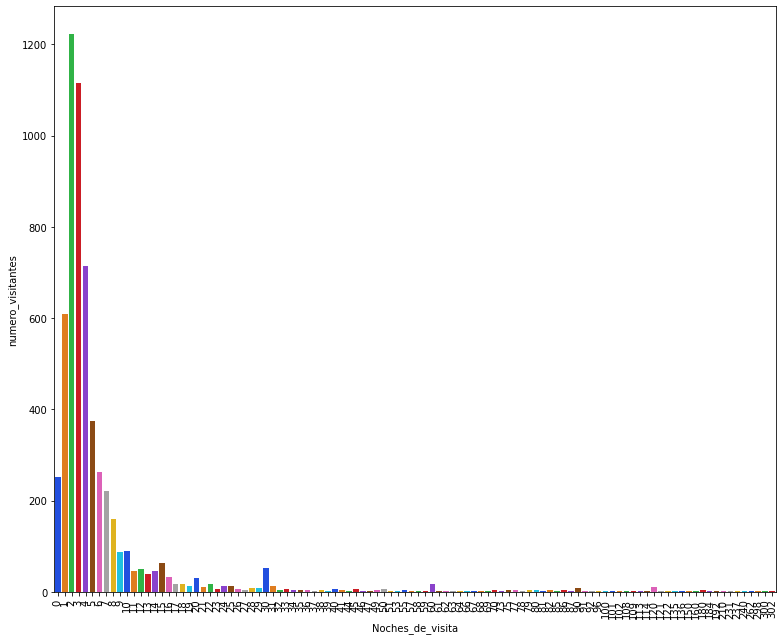

In [ ]:
#gráfica de barras noches de estancia

#Tabla de frecuencias noches
pv_noches=pd.pivot_table(data,index='Noches_de_visita',values=['A3_1_nombre_dpto'],aggfunc='count')
df_noches_frecuencia=pv_noches.rename(columns={'A3_1_nombre_dpto':'numero_visitantes'}).reset_index()
df_noches_frecuencia_orden=df_noches_frecuencia.sort_values('numero_visitantes',ascending=False)

fig, ax = plt.subplots(figsize=(11,9))
sns.barplot(x=df_noches_frecuencia_orden['Noches_de_visita'], y=df_noches_frecuencia_orden['numero_visitantes'], ax=ax, data=df_noches_frecuencia_orden,  palette='bright')

#Orientación de las categorias del eje x
plt.xticks(rotation = 90)

fig.tight_layout();

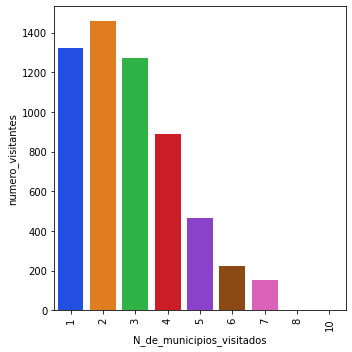

In [ ]:
#gráfica de barras número de municipios visitados

#Tabla de frecuencias número de municipios visitados
pv_municipios=pd.pivot_table(data,index='N_de_municipios_visitados',values=['A3_1_nombre_dpto'],aggfunc='count')
df_municipios_frecuencia=pv_municipios.rename(columns={'A3_1_nombre_dpto':'numero_visitantes'}).reset_index()
df_municipios_frecuencia_orden=df_municipios_frecuencia.sort_values('numero_visitantes',ascending=False)


fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(x=df_municipios_frecuencia_orden['N_de_municipios_visitados'], y=df_municipios_frecuencia_orden['numero_visitantes'], ax=ax, data=df_municipios_frecuencia_orden,  palette='bright')

#Orientación de las categorias del eje x
plt.xticks(rotation = 90)

fig.tight_layout();

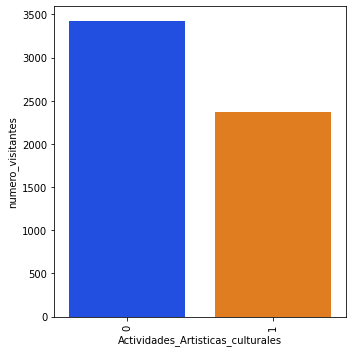

In [ ]:
#gráfica de barras activiadades artísticas-culturales

#Tabla de frecuencias actividades artísticas-culturales 1=Si realizó 0=No realizó
pv_artisticas=pd.pivot_table(data,index='Actividades_Artisticas_culturales',values=['A3_1_nombre_dpto'],aggfunc='count')
df_artisticas_frecuencia=pv_artisticas.rename(columns={'A3_1_nombre_dpto':'numero_visitantes'}).reset_index()
df_artisticas_frecuencia_orden=df_artisticas_frecuencia.sort_values('numero_visitantes',ascending=False)

fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(x=df_artisticas_frecuencia_orden['Actividades_Artisticas_culturales'], y=df_artisticas_frecuencia_orden['numero_visitantes'], ax=ax, data=df_artisticas_frecuencia_orden,  palette='bright')

#Orientación de las categorias del eje x
plt.xticks(rotation = 90)

fig.tight_layout();

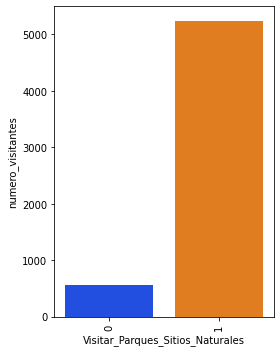

In [ ]:
#gráfica de barras actividades visita a parques y/o sitios naturales

#Tabla de frecuencias actividades visita a parques y/o sitios naturales 1=Si realizó 0=No realizó
pv_parques=pd.pivot_table(data,index='Visitar_Parques_Sitios_Naturales',values=['A3_1_nombre_dpto'],aggfunc='count')
df_parques_frecuencia=pv_parques.rename(columns={'A3_1_nombre_dpto':'numero_visitantes'}).reset_index()
df_parques_frecuencia_orden=df_parques_frecuencia.sort_values('numero_visitantes',ascending=False)

fig, ax = plt.subplots(figsize=(4,5))
sns.barplot(x=df_parques_frecuencia_orden['Visitar_Parques_Sitios_Naturales'], y=df_parques_frecuencia_orden['numero_visitantes'], ax=ax, data=df_parques_frecuencia_orden,  palette='bright')

#Orientación de las categorias del eje x
plt.xticks(rotation = 90)

fig.tight_layout();

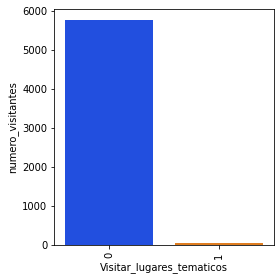

In [ ]:
#gráfica de barras actividades visitar lugares temáticos

#Tabla de frecuencias actividades visitar lugares temáticos 1=Si realizó 0=No realizó
pv_tematico=pd.pivot_table(data,index='Visitar_lugares_tematicos',values=['A3_1_nombre_dpto'],aggfunc='count')
df_tematico_frecuencia=pv_tematico.rename(columns={'A3_1_nombre_dpto':'numero_visitantes'}).reset_index()
df_tematico_frecuencia_orden=df_tematico_frecuencia.sort_values('numero_visitantes',ascending=False)

fig, ax = plt.subplots(figsize=(4,4))
sns.barplot(x=df_tematico_frecuencia_orden['Visitar_lugares_tematicos'], y=df_tematico_frecuencia_orden['numero_visitantes'], ax=ax, data=df_tematico_frecuencia_orden,  palette='bright')

#Orientación de las categorias del eje x
plt.xticks(rotation = 90)

fig.tight_layout();

In [ ]:
#gráfica de barras actividades visita casinos-juegos de azar

#Tabla de frecuencias actividades visita casinos-juegos de azar  1=Si realizó 0=No realizó
pv_juego=pd.pivot_table(data,index='Visitar_casinos_juegos_de_azar',values=['A3_1_nombre_dpto'],aggfunc='count')
df_juego_frecuencia=pv_juego.rename(columns={'A3_1_nombre_dpto':'numero_visitantes'}).reset_index()
df_juego_frecuencia_orden=df_juego_frecuencia.sort_values('numero_visitantes',ascending=False)

fig, ax = plt.subplots(figsize=(4,4))
sns.barplot(x=df_juego_frecuencia_orden['Visitar_casinos_juegos_de_azar'], y=df_juego_frecuencia_orden['numero_visitantes'], ax=ax, data=df_juego_frecuencia_orden,  palette='bright')

#Orientación de las categorias del eje x
plt.xticks(rotation = 90)

fig.tight_layout();

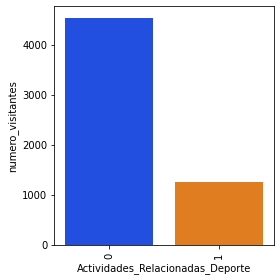

In [ ]:
#gráfica de barras actividades relacionadas con deporte

#Tabla de frecuencias actividades relacionadas con deporte  1=Si realizó 0=No realizó
pv_deporte=pd.pivot_table(data,index='Actividades_Relacionadas_Deporte',values=['A3_1_nombre_dpto'],aggfunc='count')
df_deporte_frecuencia=pv_deporte.rename(columns={'A3_1_nombre_dpto':'numero_visitantes'}).reset_index()
df_deporte_frecuencia_orden=df_deporte_frecuencia.sort_values('numero_visitantes',ascending=False)

fig, ax = plt.subplots(figsize=(4,4))
sns.barplot(x=df_deporte_frecuencia_orden['Actividades_Relacionadas_Deporte'], y=df_deporte_frecuencia_orden['numero_visitantes'], ax=ax, data=df_deporte_frecuencia_orden,  palette='bright')

#Orientación de las categorias del eje x
plt.xticks(rotation = 90)

fig.tight_layout();


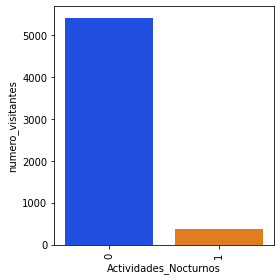

In [ ]:
#gráfica de barras actividades relacionadas con sitios nocturnos

#Tabla de frecuencias actividades relacionadas con sitios nocturnos  1=Si realizó 0=No realizó
pv_noche=pd.pivot_table(data,index='Actividades_Nocturnos',values=['A3_1_nombre_dpto'],aggfunc='count')
df_noche_frecuencia=pv_noche.rename(columns={'A3_1_nombre_dpto':'numero_visitantes'}).reset_index()
df_noche_frecuencia_orden=df_noche_frecuencia.sort_values('numero_visitantes',ascending=False)

fig, ax = plt.subplots(figsize=(4,4))
sns.barplot(x=df_noche_frecuencia_orden['Actividades_Nocturnos'], y=df_noche_frecuencia_orden['numero_visitantes'], ax=ax, data=df_noche_frecuencia_orden,  palette='bright')

#Orientación de las categorias del eje x
plt.xticks(rotation = 90)

fig.tight_layout();

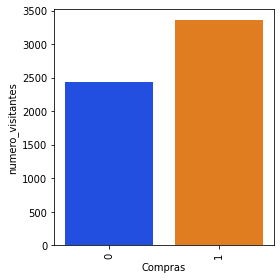

In [ ]:
#gráfica de barras actividades relacionadas con compras

#Tabla de frecuencias actividades relacionadas con compras  1=Si realizó 0=No realizó
pv_compra=pd.pivot_table(data,index='Compras',values=['A3_1_nombre_dpto'],aggfunc='count')
df_compra_frecuencia=pv_compra.rename(columns={'A3_1_nombre_dpto':'numero_visitantes'}).reset_index()
df_compra_frecuencia_orden=df_compra_frecuencia.sort_values('numero_visitantes',ascending=False)

fig, ax = plt.subplots(figsize=(4,4))
sns.barplot(x=df_compra_frecuencia_orden['Compras'], y=df_compra_frecuencia_orden['numero_visitantes'], ax=ax, data=df_compra_frecuencia_orden,  palette='bright')

#Orientación de las categorias del eje x
plt.xticks(rotation = 90)

fig.tight_layout();


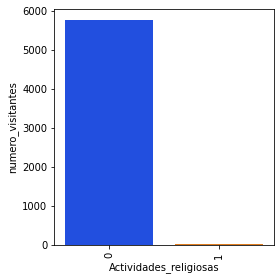

In [ ]:
#gráfica de barras actividades religiosas

#Tabla de frecuencias actividades religiosas  1=Si realizó 0=No realizó
pv_religion=pd.pivot_table(data,index='Actividades_religiosas',values=['A3_1_nombre_dpto'],aggfunc='count')
df_religion_frecuencia=pv_religion.rename(columns={'A3_1_nombre_dpto':'numero_visitantes'}).reset_index()
df_religion_frecuencia_orden=df_religion_frecuencia.sort_values('numero_visitantes',ascending=False)

fig, ax = plt.subplots(figsize=(4,4))
sns.barplot(x=df_religion_frecuencia_orden['Actividades_religiosas'], y=df_religion_frecuencia_orden['numero_visitantes'], ax=ax, data=df_religion_frecuencia_orden,  palette='bright')

#Orientación de las categorias del eje x
plt.xticks(rotation = 90)

fig.tight_layout();

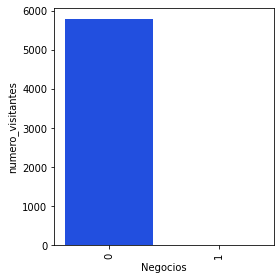

In [ ]:
#gráfica de barras actividades relacionadas con negocios

#Tabla de frecuencias actividades relacionadas con negocios  1=Si realizó 0=No realizó
pv_negocio=pd.pivot_table(data,index='Negocios',values=['A3_1_nombre_dpto'],aggfunc='count')
df_negocio_frecuencia=pv_negocio.rename(columns={'A3_1_nombre_dpto':'numero_visitantes'}).reset_index()
df_negocio_frecuencia_orden=df_negocio_frecuencia.sort_values('numero_visitantes',ascending=False)

fig, ax = plt.subplots(figsize=(4,4))
sns.barplot(x=df_negocio_frecuencia_orden['Negocios'], y=df_negocio_frecuencia_orden['numero_visitantes'], ax=ax, data=df_negocio_frecuencia_orden,  palette='bright')

#Orientación de las categorias del eje x
plt.xticks(rotation = 90)

fig.tight_layout();


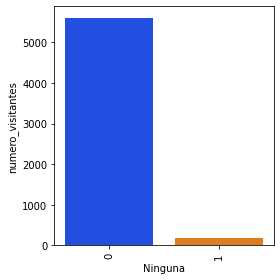

In [ ]:
#gráfica de barras no realizó ninguna actividad

#Tabla de frecuencias no realizó ninguna actividad  1=Si realizó 0=No realizó
pv_nada=pd.pivot_table(data,index='Ninguna',values=['A3_1_nombre_dpto'],aggfunc='count')
df_nada_frecuencia=pv_nada.rename(columns={'A3_1_nombre_dpto':'numero_visitantes'}).reset_index()
df_nada_frecuencia_orden=df_nada_frecuencia.sort_values('numero_visitantes',ascending=False)

fig, ax = plt.subplots(figsize=(4,4))
sns.barplot(x=df_nada_frecuencia_orden['Ninguna'], y=df_nada_frecuencia_orden['numero_visitantes'], ax=ax, data=df_nada_frecuencia_orden,  palette='bright')

#Orientación de las categorias del eje x
plt.xticks(rotation = 90)

fig.tight_layout();


In [ ]:
#gráfica de barras transporte para llegar al departamento

#Tabla de frecuencias transporte para llegar al departamento
pv_trans=pd.pivot_table(data,index='Transporte_usado_para_llegar',values=['A3_1_nombre_dpto'],aggfunc='count')
df_trans_frecuencia=pv_trans.rename(columns={'A3_1_nombre_dpto':'numero_visitantes'}).reset_index()
df_trans_frecuencia_orden=df_trans_frecuencia.sort_values('numero_visitantes',ascending=False)

fig, ax = plt.subplots(figsize=(4,4))
sns.barplot(x=df_trans_frecuencia_orden['Transporte_usado_para_llegar'], y=df_trans_frecuencia_orden['numero_visitantes'], ax=ax, data=df_trans_frecuencia_orden,  palette='bright')

#Orientación de las categorias del eje x
plt.xticks(rotation = 90)

fig.tight_layout();

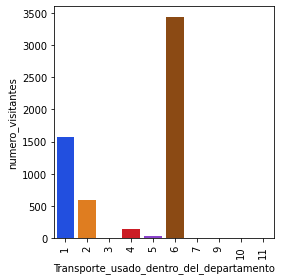

In [ ]:
#gráfica de barras transporte usado dentro del departamento

#Tabla de frecuencias transporte usado dentro del departamento
pv_dentro=pd.pivot_table(data,index='Transporte_usado_dentro_del_departamento',values=['A3_1_nombre_dpto'],aggfunc='count')
df_dentro_frecuencia=pv_dentro.rename(columns={'A3_1_nombre_dpto':'numero_visitantes'}).reset_index()
df_dentro_frecuencia_orden=df_dentro_frecuencia.sort_values('numero_visitantes',ascending=False)

fig, ax = plt.subplots(figsize=(4,4))
sns.barplot(x=df_dentro_frecuencia_orden['Transporte_usado_dentro_del_departamento'], y=df_dentro_frecuencia_orden['numero_visitantes'], ax=ax, data=df_dentro_frecuencia_orden,  palette='bright')

#Orientación de las categorias del eje x
plt.xticks(rotation = 90)

fig.tight_layout();

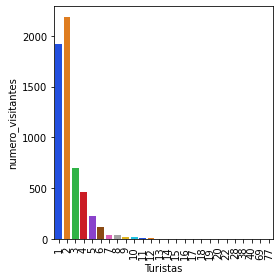

In [ ]:
#gráfica de barras tamaño del grupo de viaje

#Tabla de frecuencias tamaño grupo
pv_grupo=pd.pivot_table(data,index='Turistas',values=['A3_1_nombre_dpto'],aggfunc='count')
df_grupo_frecuencia=pv_grupo.rename(columns={'A3_1_nombre_dpto':'numero_visitantes'}).reset_index()
df_grupo_frecuencia_orden=df_grupo_frecuencia.sort_values('numero_visitantes',ascending=False)

fig, ax = plt.subplots(figsize=(4,4))
sns.barplot(x=df_grupo_frecuencia_orden['Turistas'], y=df_grupo_frecuencia_orden['numero_visitantes'], ax=ax, data=df_grupo_frecuencia_orden,  palette='bright')

#Orientación de las categorias del eje x
plt.xticks(rotation = 90)

fig.tight_layout();


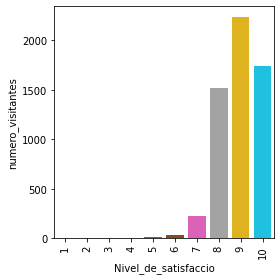

In [ ]:
#gráfica de barras nivel de satisfacción

#Tabla de frecuencias satisfacción
pv_satisf=pd.pivot_table(data,index='Nivel_de_satisfaccio',values=['A3_1_nombre_dpto'],aggfunc='count')
df_satisf_frecuencia=pv_satisf.rename(columns={'A3_1_nombre_dpto':'numero_visitantes'}).reset_index()
df_satisf_frecuencia_orden=df_satisf_frecuencia.sort_values('numero_visitantes',ascending=False)

fig, ax = plt.subplots(figsize=(4,4))
sns.barplot(x=df_satisf_frecuencia_orden['Nivel_de_satisfaccio'], y=df_satisf_frecuencia_orden['numero_visitantes'], ax=ax, data=df_satisf_frecuencia_orden,  palette='bright')

#Orientación de las categorias del eje x
plt.xticks(rotation = 90)

fig.tight_layout();

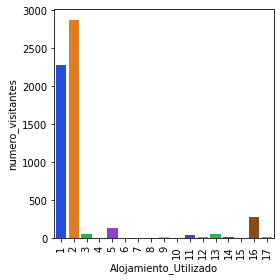

In [ ]:
#gráfica de barras alojamiento utilizado

#Tabla de frecuencias alojamiento
pv_aloja=pd.pivot_table(data,index='Alojamiento_Utilizado',values=['A3_1_nombre_dpto'],aggfunc='count')
df_aloja_frecuencia=pv_aloja.rename(columns={'A3_1_nombre_dpto':'numero_visitantes'}).reset_index()
df_aloja_frecuencia_orden=df_aloja_frecuencia.sort_values('numero_visitantes',ascending=False)

fig, ax = plt.subplots(figsize=(4,4))
sns.barplot(x=df_aloja_frecuencia_orden['Alojamiento_Utilizado'], y=df_aloja_frecuencia_orden['numero_visitantes'], ax=ax, data=df_aloja_frecuencia_orden,  palette='bright')

#Orientación de las categorias del eje x
plt.xticks(rotation = 90)

fig.tight_layout();


**Gráficos bivariados**

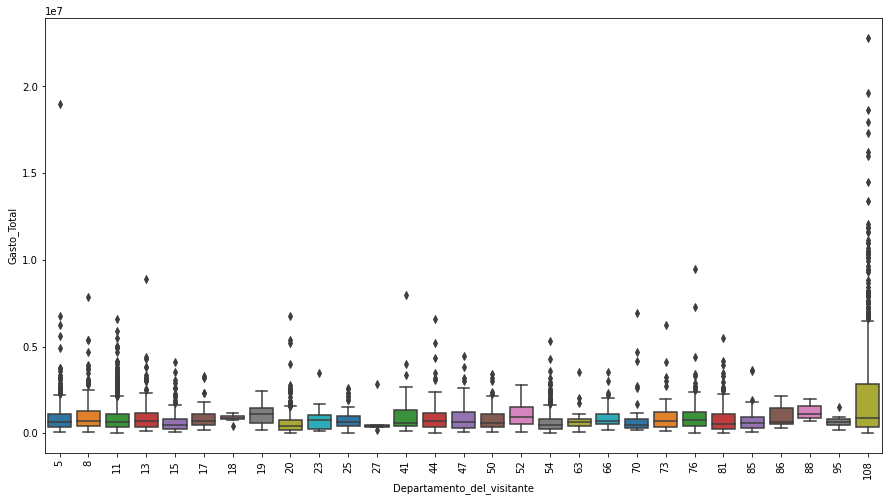

In [ ]:
#Boxplot lugar de residencia
plt.figure(figsize = (15,8))
ax=sns.boxplot(x="Departamento_del_visitante", y="Gasto_Total", data=data, palette="tab10")
plt.xticks(rotation=90)
plt.show()

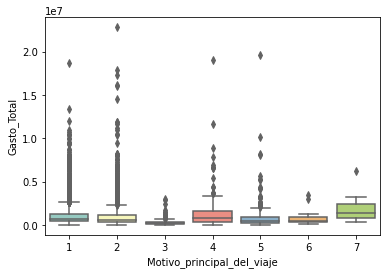

In [ ]:
#Boxplot motivo principal del viaje
sns.boxplot(x="Motivo_principal_del_viaje", y="Gasto_Total", data=data, palette="Set3");

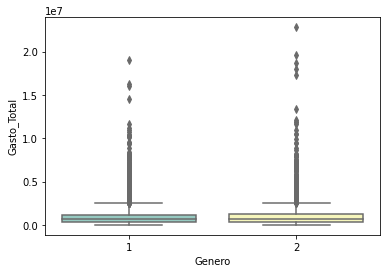

In [ ]:
#Boxplot género
sns.boxplot(x="Genero", y="Gasto_Total", data=data, palette="Set3");

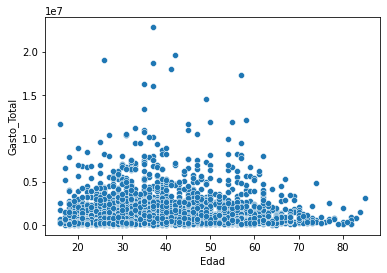

In [ ]:
#Gráfico de dispersión edad vs gasto total
ax = sns.scatterplot(x="Edad", y="Gasto_Total", data=data)

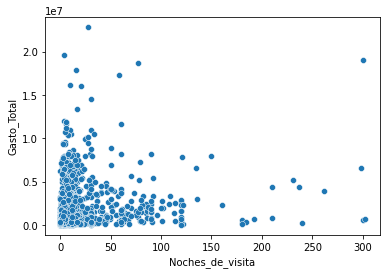

In [ ]:
#Gráfico de dispersión Noches de visita vs gasto total
ax = sns.scatterplot(x="Noches_de_visita", y="Gasto_Total", data=data)

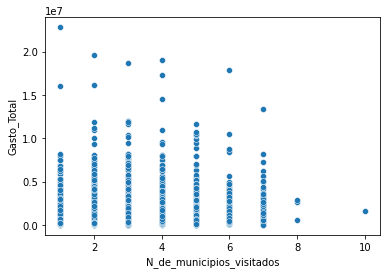

In [ ]:
#Gráfico de dispersión Noches de visita vs gasto total
ax = sns.scatterplot(x="N_de_municipios_visitados", y="Gasto_Total", data=data)

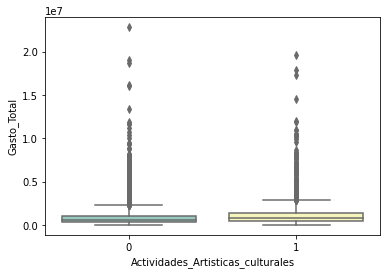

In [ ]:
#Boxplot artisticas-culturales
sns.boxplot(x="Actividades_Artisticas_culturales", y="Gasto_Total", data=data, palette="Set3")

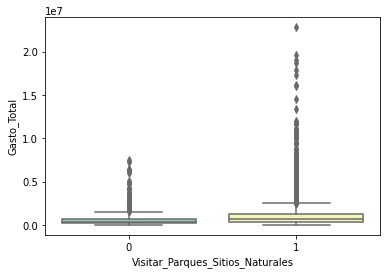

In [ ]:
#Boxplot visitar parque y/o sitios naturales
sns.boxplot(x="Visitar_Parques_Sitios_Naturales", y="Gasto_Total", data=data, palette="Set3");

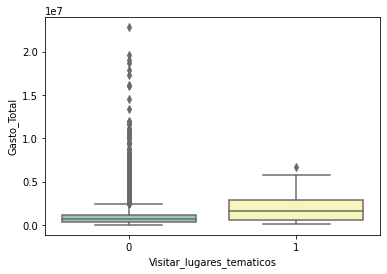

In [ ]:
#Boxplot visitar lugares temáticos
sns.boxplot(x="Visitar_lugares_tematicos", y="Gasto_Total", data=data, palette="Set3");

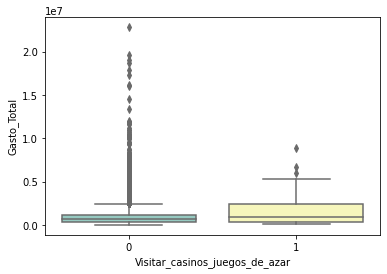

In [ ]:
#Boxplot visitar casinos-juegos de azar
sns.boxplot(x="Visitar_casinos_juegos_de_azar", y="Gasto_Total", data=data, palette="Set3");

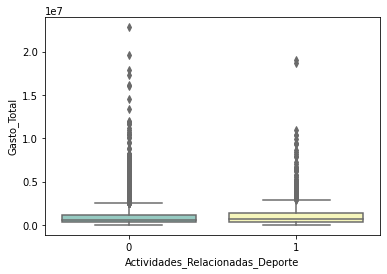

In [ ]:
#Boxplot actividades relacionadas con deporte
sns.boxplot(x="Actividades_Relacionadas_Deporte", y="Gasto_Total", data=data, palette="Set3");

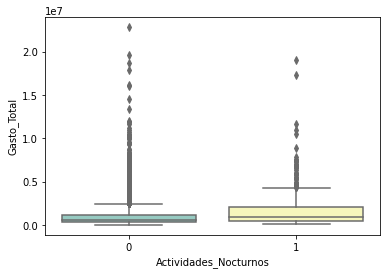

In [ ]:
#Boxplot actividades relacionadas con sitios nocturnos
sns.boxplot(x="Actividades_Nocturnos", y="Gasto_Total", data=data, palette="Set3");

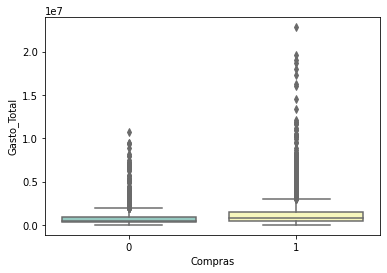

In [ ]:
#Boxplot actividades relacionadas con compras
sns.boxplot(x="Compras", y="Gasto_Total", data=data, palette="Set3");

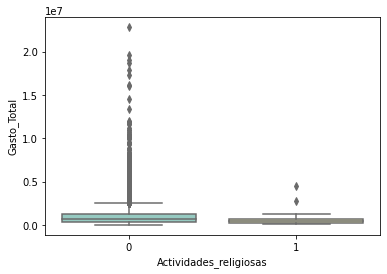

In [ ]:
#Boxplot actividades religiosas
sns.boxplot(x="Actividades_religiosas", y="Gasto_Total", data=data, palette="Set3");

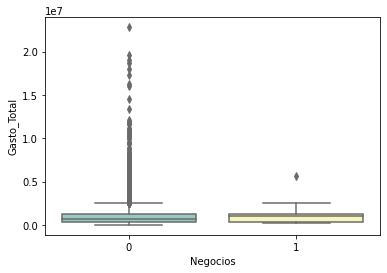

In [ ]:
#Boxplot actividades relacionadas con negocios
sns.boxplot(x="Negocios", y="Gasto_Total", data=data, palette="Set3");

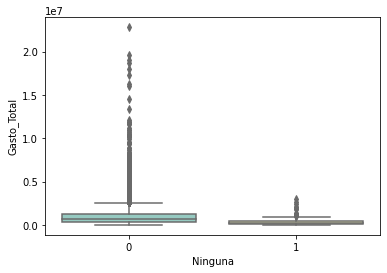

In [ ]:
#Boxplot ningún tipo de actividad
sns.boxplot(x="Ninguna", y="Gasto_Total", data=data, palette="Set3");

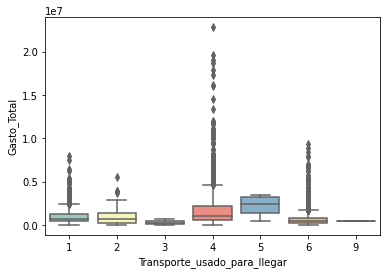

In [ ]:
#Boxplot transporte para llegar
sns.boxplot(x="Transporte_usado_para_llegar", y="Gasto_Total", data=data, palette="Set3");

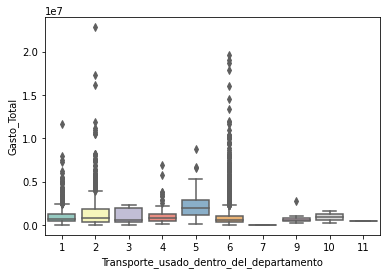

In [ ]:
#Boxplot transporte usado dentro del departamento
sns.boxplot(x="Transporte_usado_dentro_del_departamento", y="Gasto_Total", data=data, palette="Set3");

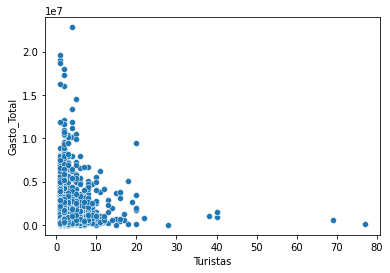

In [ ]:
#Gráfico de dispersión tamaño grupo
ax = sns.scatterplot(x="Turistas", y="Gasto_Total", data=data)

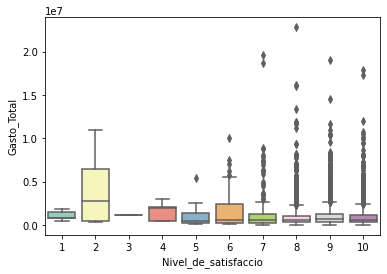

In [ ]:
#Boxplot satisfacción
sns.boxplot(x="Nivel_de_satisfaccio", y="Gasto_Total", data=data, palette="Set3");

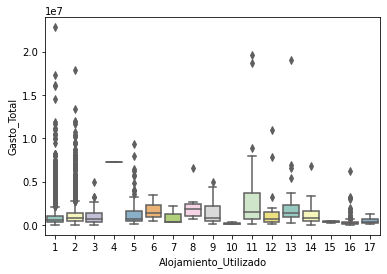

In [ ]:
#Boxplot alojamiento
sns.boxplot(x="Alojamiento_Utilizado", y="Gasto_Total", data=data, palette="Set3");

In [ ]:
df_variables=data[['Departamento_del_visitante','Motivo_principal_del_viaje','Genero','Edad',
                  'Noches_de_visita','N_de_municipios_visitados','Actividades_Artisticas_culturales',
                  'Visitar_Parques_Sitios_Naturales','Visitar_lugares_tematicos','Visitar_casinos_juegos_de_azar',
                  'Actividades_Relacionadas_Deporte','Actividades_Nocturnos','Compras','Actividades_religiosas',
                  'Negocios','Ninguna','Transporte_usado_para_llegar','Transporte_usado_dentro_del_departamento',
                  'Transporte_usado_dentro_del_departamento','Turistas','Gasto_Total','Nivel_de_satisfaccio',
                    'Alojamiento_Utilizado']]

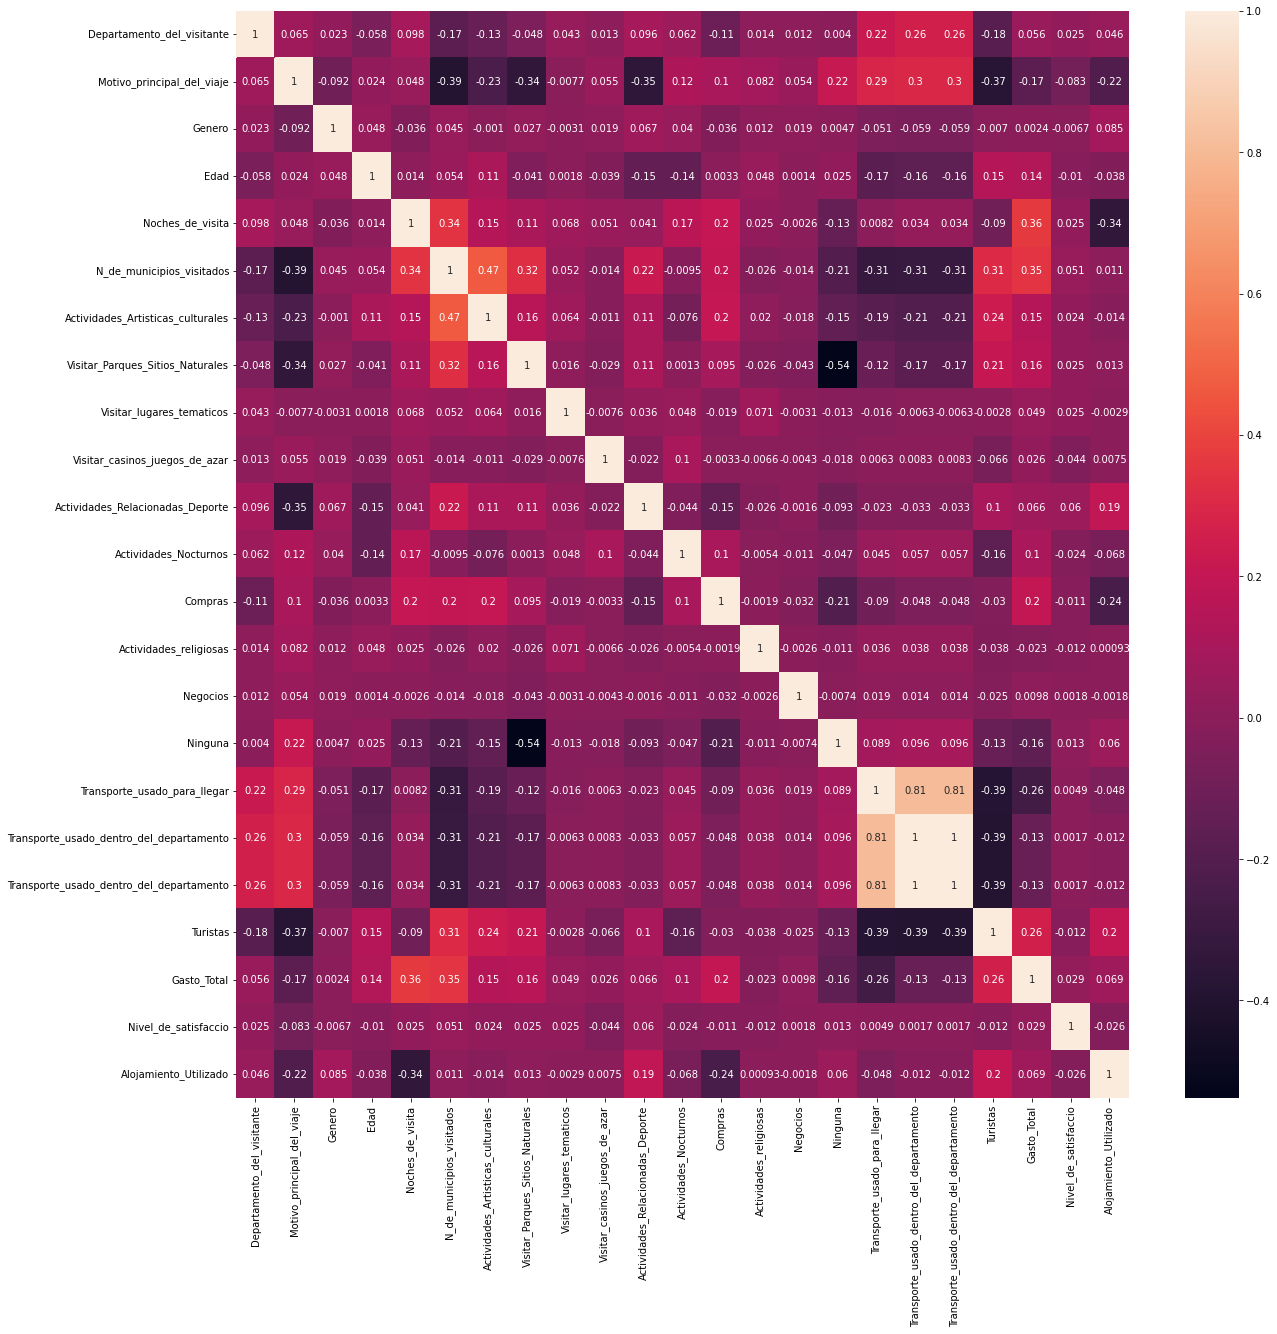

In [ ]:
#Matriz de correlación de Spearman
corr = df_variables.corr(method = 'spearman')
plt.figure(figsize = (20,20))
sns.heatmap(corr, annot = True)
plt.show()

## **3.3 Tecnicas de aprendizaje supervisado**

## **3.3.1 Regresión  Multiple:**



In [ ]:
#data de trabajo para el modelo
data1=data[['Gasto_Total','Departamento_del_visitante','Transporte_usado_para_llegar','Noches_de_visita',
            'N_de_municipios_visitados','Alojamiento_Utilizado']]

In [ ]:
data1.head()

,Gasto_Total,Departamento_del_visitante,Transporte_usado_para_llegar,Noches_de_visita,N_de_municipios_visitados,Alojamiento_Utilizado
0,750000,15,6,4,4,1
1,350000,15,1,1,5,2
2,850000,15,1,3,1,2
3,190000,15,6,0,1,16
4,600000,15,1,1,2,2


In [ ]:
#Se tranforman las variables nominales en binarias
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

one_hot = OneHotEncoder()
encoded_departamento= one_hot.fit_transform(data1[['Departamento_del_visitante']])
encoded_departamento_df = pd.DataFrame(encoded_departamento.toarray(), columns=one_hot.get_feature_names(['Departamento_del_visitante_']))

encoded_transporte= one_hot.fit_transform(data1[['Transporte_usado_para_llegar']])
encoded_transporte_df = pd.DataFrame(encoded_transporte.toarray(), columns=one_hot.get_feature_names(['Transporte_usado_para_llegar_']))

encoded_alojamiento= one_hot.fit_transform(data1[['Alojamiento_Utilizado']])
encoded_alojamiento_df = pd.DataFrame(encoded_alojamiento.toarray(), columns=one_hot.get_feature_names(['Alojamiento_Utilizado_']))

data2 = pd.concat([data1, encoded_departamento_df,encoded_transporte_df,encoded_alojamiento_df], axis=1)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
data2.head()

,Gasto_Total,Departamento_del_visitante,Transporte_usado_para_llegar,Noches_de_visita,N_de_municipios_visitados,Alojamiento_Utilizado,Departamento_del_visitante__5,Departamento_del_visitante__8,Departamento_del_visitante__11,Departamento_del_visitante__13,...,Alojamiento_Utilizado__8,Alojamiento_Utilizado__9,Alojamiento_Utilizado__10,Alojamiento_Utilizado__11,Alojamiento_Utilizado__12,Alojamiento_Utilizado__13,Alojamiento_Utilizado__14,Alojamiento_Utilizado__15,Alojamiento_Utilizado__16,Alojamiento_Utilizado__17
0,750000,15,6,4,4,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,350000,15,1,1,5,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,850000,15,1,3,1,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,190000,15,6,0,1,16,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,600000,15,1,1,2,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# eliminar las variables categóricas originales
df = data2.drop(['Departamento_del_visitante','Transporte_usado_para_llegar','Alojamiento_Utilizado'], axis=1)

In [ ]:
#Normalizar las variables numéricas
scaler = MinMaxScaler()
numerical_cols = ['Gasto_Total', 'Noches_de_visita','N_de_municipios_visitados']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [ ]:
#Segmentación de la data en variable respuesta y variables predictoras
X = df.iloc[:,1:56].values
y = df.iloc[:,0].values

In [ ]:
#Se realiza la descomposición aleatoria de la base de datos con la proporción 70%-30% para train y test, respectivamente.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [ ]:
#Regresión lineal múltiple

In [ ]:
#Se crea el modelo de regresión
from sklearn.metrics import mean_squared_error

linreg=LinearRegression()

linreg.fit(X_train, y_train)

y_pred_train=linreg.predict(X_train)
R2_lineal_train=linreg.score(X_train, y_train)
rmse_train=mean_squared_error(y_train, y_pred_train)

#medidas de desempeño del modelo con datos de entrenamiento
print(r'R^2 (train)',R2_lineal_train)
print('Coeficientes: \n', linreg.coef_[0], linreg.intercept_)
print('MSE (train)', rmse_train)
print('sqrt_RMSE (train)',np.sqrt(rmse_train))

#predecir valores de y para el set de prueba
y_pred_test = linreg.predict(X_test)
R2_lineal_test=linreg.score(X_test, y_test)
rmse_test=mean_squared_error(y_test, y_pred_test)

#medidas de desempeño del modelo con datos de prueba
print(r'R^2 (test)',R2_lineal_test)
print('MSE (test)', rmse_test)
print('sqrt_RMSE (test)',np.sqrt(rmse_test))

R^2 (train) 0.29185602966253676
Coeficientes: 
 0.16052133815555408 -220330951662.8807
MSE (train) 0.0027385094109994676
sqrt_RMSE (train) 0.05233076925671423
R^2 (test) -8.092163528741894e+20
MSE (test) 4.1613522760033495e+18
sqrt_RMSE (test) 2039939282.4305701


In [ ]:
#Se concatenan los valores predichos por el modelo y los datos de entrenamiento
df_y_pred = pd.DataFrame(y_pred_train)
df_y_train=pd.DataFrame(y_train)
df_pred_train=pd.concat([df_y_pred,df_y_train], axis=1)
df_predicho_train=df_pred_train.set_axis(['y_pred_train', 'y_train'], axis=1)
df_predicho_train['error']=df_predicho_train['y_pred_train']-df_predicho_train['y_train']

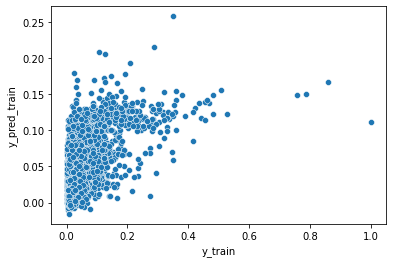

In [ ]:
#Gráfica de dispersión entre los valores predichos y los datos de entrenamiento
ax = sns.scatterplot(x="y_train", y="y_pred_train", data=df_predicho_train)

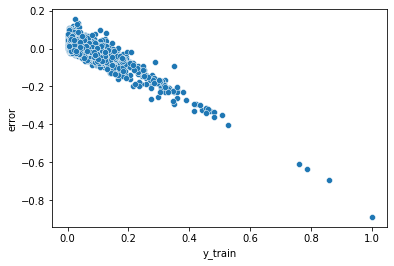

In [ ]:
#Gráfica de dispersión entre los datos de entreamiento y los errores residuales
ax = sns.scatterplot(x="y_train", y="error", data=df_predicho_train)

# **3.3.2 Regresión polinomial**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

transformer = PolynomialFeatures(2)

X_train_poly = transformer.fit_transform(X_train);

In [ ]:
reg_poly = LinearRegression().fit(X_train_poly, y_train)
y_pred_train = reg_poly.predict(X_train_poly)

X_test_poly = transformer.fit_transform(X_test)
y_pred_test = reg_poly.predict(X_test_poly)


In [ ]:
R2_lineal_train=reg_poly.score(X_train_poly, y_train)
rmse_train=mean_squared_error(y_train, y_pred_train)
print(r'R^2 (train)',R2_lineal_train)
print('MSE (train)', rmse_train)
print('sqrt_RMSE (train)',np.sqrt(rmse_train))

R2_lineal_test=reg_poly.score(X_test_poly, y_test)
rmse_test=mean_squared_error(y_test, y_pred_test)
print(r'R^2 (test)',R2_lineal_test)
print('MSE (test)', rmse_test)
print('sqrt_RMSE (test)',np.sqrt(rmse_test))


R^2 (train) 0.4970470620639539
MSE (train) 0.0019450018802974864
sqrt_RMSE (train) 0.044102175459919055
R^2 (test) -2.982034866092584e+22
MSE (test) 1.5334956508306027e+20
sqrt_RMSE (test) 12383439146.015144


In [ ]:
#Se concatenan los valores predichos por el modelo y los datos de entrenamiento
df_y_pred_poly = pd.DataFrame(y_pred_train)
df_y_train=pd.DataFrame(y_train)
df_pred_train_poly=pd.concat([df_y_pred_poly,df_y_train], axis=1)
df_predicho_train_poly=df_pred_train_poly.set_axis(['y_pred_train', 'y_train'], axis=1)
df_predicho_train_poly['error']=df_predicho_train_poly['y_pred_train']-df_predicho_train_poly['y_train']

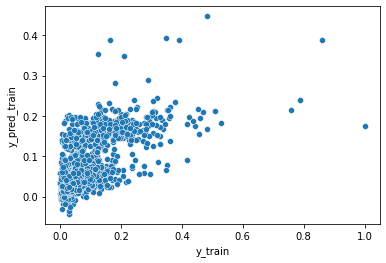

In [ ]:
#Gráfica de dispersión entre los valores predichos y los datos de entreamiento
ax = sns.scatterplot(x="y_train", y="y_pred_train", data=df_predicho_train_poly)

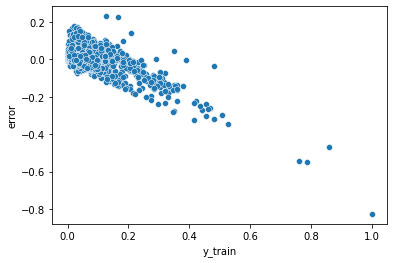

In [ ]:
#Gráfica de dispersión entre los datos de entreamiento y los errores residuales
ax = sns.scatterplot(x="y_train", y="error", data=df_predicho_train_poly)


El modelo de regresión lineal y el polinomial, no permiten predecir el gasto turístico en función de la variables independientes, teniendo en cuenta que el comportamiento de los valores predichos y de entrenamiento en los gráficos de dispersión no muestran una tendencian lineal o exponencial, respectivamente.  Adicionalmente, los valores residuales tienen una tendencia decreciente según el gráfico de despersión.

* Teniendo en cuenta el análisis gráfico no se hace lectura de las métricas de entrenamiento y de prueba y no se plantea una validación cruzada para ningún modelo de regresión.

# **3.3.3 KNN:**

Se implementa un algoritmo KNN de regresión para predecir la variable Gasto_Total. Se realiza preprocesamiento de las variables categoricas con el método de One Hot encoding. La idea detrás del One Hot Encoding es crear una columna adicional para cada categoría única en la variable categórica, y asignar un valor de 1 o 0 a cada columna dependiendo de si la observación pertenece o no a esa categoría.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score


Selección de variable objetivo y variables independientes.

In [ ]:
X = df.drop('Gasto_Total', axis=1)
y = df['Gasto_Total']

Separación de las variables en numericas y categoricas.

In [ ]:
num_cols = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]
cat_cols = [col for col in X.columns if X[col].dtype in ['object', 'category']]

Separacion de los datos con una proporcion de 80% para datos de entrenamiento y 20% para datos de prueba.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Implementar el preprocesamiento de los datos de entreamiento para que se le aplica el One hot encoding a las variables categoricas y el escalamiento min max a las variables numericas.

In [ ]:
num_transformer = MinMaxScaler()

cat_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])

In [ ]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                 ['Noches_de_visita',
                                  'N_de_municipios_visitados',
                                  'Departamento_del_visitante__5',
                                  'Departamento_del_visitante__8',
                                  'Departamento_del_visitante__11',
                                  'Departamento_del_visitante__13',
                                  'Departamento_del_visitante__15',
                                  'Departamento_del_visitante__17',
                                  'Departamento_del_visitante__18',
                                  'Departamento_del_v...
                                  'Departamento_del_visitante__66',
                                  'Departamento_del_visitante__70',
                                  'Departamento_del_visitante__73',
                                  'Departamento_del_visitante__76',
                        

Implementar el preprocesamiento para los datos de entrenamiento y de prueba.

In [ ]:
X_train_final = preprocessor.transform(X_train)
X_test_final = preprocessor.transform(X_test)

Ejecución del modelo Knn con una validacion cruzada para encontrar el mejor valor de k (que minimiza el error).

In [ ]:
knn = KNeighborsRegressor()

scores = []
for k in range(1, 20):
    knn.n_neighbors = k
    scores.append(-1 * cross_val_score(knn, X_train_final, y_train, cv=5, scoring='neg_root_mean_squared_error').mean())

best_k = scores.index(min(scores)) + 1
print(scores)
print(best_k)

[0.06273800361634393, 0.05486131634899356, 0.052153435653259285, 0.05157138744262676, 0.050217149608562515, 0.04967863841430976, 0.04939718336555524, 0.048969474224467915, 0.048594509804828136, 0.04847505076712215, 0.04838886029680646, 0.04830612500558134, 0.04832304076495899, 0.04820835928615537, 0.04822780084005278, 0.04827611779415632, 0.04845688595996892, 0.04852300081004183, 0.04844686861665939]
14


Confirmación del valor escogido con la grafica del codo.

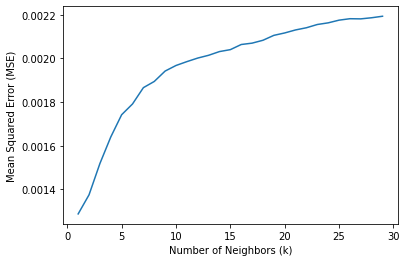

In [ ]:
mse_values = []

for k in range(1, 30):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_final, y_train)
    mse = ((knn.predict(X_train_final) - y_train) ** 2).mean()
    mse_values.append(mse)

plt.plot(range(1, 30), mse_values)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.show()

Finalmente se realiza las predicciones con los datos de prueba.

In [ ]:
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(X_train_final, y_train)

y_pred = knn.predict(X_test_final)

print('R-squared score for test set: ', knn.score(X_test_final, y_test))

R-squared score for test set:  0.35735767061265244


# **3.3.4 Random Forest:**
Importar paquetes necesarios:


In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

import seaborn as sns
import matplotlib.pyplot as plt

Cargue de los datos en un DataFrame de Pandas:

In [ ]:
df = pd.read_pickle("/content/turismoreceptorf1.pickle")
df.head()

,Departamento_del_visitante,Motivo_principal_del_viaje,Genero,Edad,Noches_de_visita,N_de_municipios_visitados,Actividades_Artisticas_culturales,Visitar_Parques_Sitios_Naturales,Visitar_lugares_tematicos,Visitar_casinos_juegos_de_azar,...,Transporte_usado_para_llegar,Transporte_usado_dentro_del_departamento,Turistas,Gasto_Total,Nivel_de_satisfaccio,A3_2_nombre_pais_esp,A3_1_nombre_dpto,A3_1_nombre_ciudad,lugar_residencia_km,Alojamiento_Utilizado
0,15,2,2,39,4,4,0,1,0,0,...,6,6,2,750000,10,Colombia,Boyacá,Moniquirá,178.1,1
1,15,1,2,61,1,5,1,1,0,0,...,1,1,4,350000,8,Colombia,Boyacá,Moniquirá,178.1,2
2,15,1,2,72,3,1,0,1,0,0,...,1,1,2,850000,9,Colombia,Boyacá,Moniquirá,178.1,2
3,15,3,1,30,0,1,0,1,0,0,...,6,6,1,190000,8,Colombia,Boyacá,Moniquirá,178.1,16
4,15,1,2,34,1,2,0,1,0,0,...,1,1,2,600000,10,Colombia,Boyacá,Moniquirá,178.1,2


Separamos las características (X) y la variable objetivo (y):

In [ ]:
df.columns

Index(['Departamento_del_visitante', 'Motivo_principal_del_viaje', 'Genero',
       'Edad', 'Noches_de_visita', 'N_de_municipios_visitados',
       'Actividades_Artisticas_culturales', 'Visitar_Parques_Sitios_Naturales',
       'Visitar_lugares_tematicos', 'Visitar_casinos_juegos_de_azar',
       'Actividades_Relacionadas_Deporte', 'Actividades_Nocturnos', 'Compras',
       'Actividades_religiosas', 'Negocios', 'Ninguna',
       'Transporte_usado_para_llegar',
       'Transporte_usado_dentro_del_departamento', 'Turistas', 'Gasto_Total',
       'Nivel_de_satisfaccio', 'A3_2_nombre_pais_esp', 'A3_1_nombre_dpto',
       'A3_1_nombre_ciudad', 'lugar_residencia_km', 'Alojamiento_Utilizado'],
      dtype='object')

In [ ]:
X = df[["Departamento_del_visitante","Transporte_usado_para_llegar","N_de_municipios_visitados","Alojamiento_Utilizado","Noches_de_visita"]]
y = df["Gasto_Total"]

Dividir los datos en conjuntos de entrenamiento y prueba:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Seleccionamos las variables categóricas y numéricas:

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4050 entries, 5635 to 2732
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Departamento_del_visitante    4050 non-null   int64
 1   Transporte_usado_para_llegar  4050 non-null   int64
 2   N_de_municipios_visitados     4050 non-null   int64
 3   Alojamiento_Utilizado         4050 non-null   int64
 4   Noches_de_visita              4050 non-null   int64
dtypes: int64(5)
memory usage: 189.8 KB


In [ ]:
categorical_features = X_train.select_dtypes(include=["category"]).columns
numeric_features = X_train.select_dtypes(include=["int64", "float64"]).columns

Aplicar la codificación one-hot a las variables categóricas:

In [ ]:
categorical_features

Index([], dtype='object')

In [ ]:
numeric_features_index = X_train.columns.get_indexer(numeric_features)
categorical_features_index = X_train.columns.get_indexer(categorical_features)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", 'passthrough', numeric_features_index),
        ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_features_index)
    ])

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

Crear un arbol de decisión:

In [ ]:
regressor = DecisionTreeRegressor(random_state=0)

Realizar la validación cruzada K-Fold

In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=0)
cv_results = cross_validate(regressor, X_train, y_train, cv=kfold, scoring=["r2", "neg_mean_absolute_error", "neg_root_mean_squared_error"])

In [ ]:
pd.DataFrame(cv_results)

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_root_mean_squared_error
0,0.008656,0.001132,0.276838,-674245.736106,-1.259842e+06
1,0.005473,0.001020,0.119998,-604339.349375,-1.133525e+06
2,0.005509,0.000954,-0.089764,-715698.320167,-1.351773e+06
3,0.005302,0.000930,-0.078278,-757604.494610,-1.440667e+06
4,0.005658,0.001009,0.020437,-728544.833513,-1.332286e+06
5,0.005119,0.000959,0.195975,-708998.367047,-1.224307e+06
6,0.005523,0.000930,-0.036772,-664624.898168,-1.259734e+06
7,0.007307,0.004491,-0.158076,-653200.919061,-1.246973e+06
8,0.021745,0.002088,-0.021970,-767422.134311,-1.773073e+06
9,0.007650,0.001559,0.381974,-700489.651296,-1.394885e+06


Entrenar modelo con los datos de entrenamiento y hacer prediciones

In [ ]:
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
regressor.score(X_test, y_test)

-0.09912231779822456

Realizar gráfica para ver los resultados

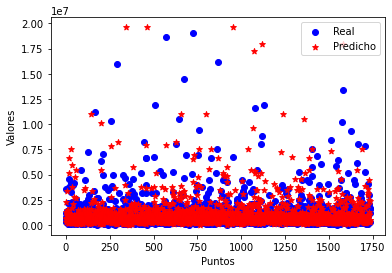

In [ ]:
# Graficar el valor real y predicho en estrellas rojas
plt.scatter(range(len(y_test)), y_test, color='blue', label='Real')
plt.scatter(range(len(y_test)), y_pred, color='red', marker='*', label='Predicho')

# Añadir labels y leyendas al plot
plt.xlabel('Puntos')
plt.ylabel('Valores')
plt.legend()

# Mostrar el plot
plt.show()

# **3.4 Tecnica de analisis no supervisado**

# **3.4.1 K-Protatype:**
Importar los paquetes necesarios:


In [ ]:
!pip install kmodes

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import KFold
from kmodes.kprototypes import KPrototypes

Cargar datos en un DataFrame de Pandas:

In [ ]:
# -------- inicio-----

In [ ]:
df1 = pd.read_pickle("turismoreceptorf1.pickle")
df1.head()

,Departamento_del_visitante,Motivo_principal_del_viaje,Genero,Edad,Noches_de_visita,N_de_municipios_visitados,Actividades_Artisticas_culturales,Visitar_Parques_Sitios_Naturales,Visitar_lugares_tematicos,Visitar_casinos_juegos_de_azar,...,Transporte_usado_para_llegar,Transporte_usado_dentro_del_departamento,Turistas,Gasto_Total,Nivel_de_satisfaccio,A3_2_nombre_pais_esp,A3_1_nombre_dpto,A3_1_nombre_ciudad,lugar_residencia_km,Alojamiento_Utilizado
0,15,2,2,39,4,4,0,1,0,0,...,6,6,2,750000,10,Colombia,Boyacá,Moniquirá,178.1,1
1,15,1,2,61,1,5,1,1,0,0,...,1,1,4,350000,8,Colombia,Boyacá,Moniquirá,178.1,2
2,15,1,2,72,3,1,0,1,0,0,...,1,1,2,850000,9,Colombia,Boyacá,Moniquirá,178.1,2
3,15,3,1,30,0,1,0,1,0,0,...,6,6,1,190000,8,Colombia,Boyacá,Moniquirá,178.1,16
4,15,1,2,34,1,2,0,1,0,0,...,1,1,2,600000,10,Colombia,Boyacá,Moniquirá,178.1,2


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5786 entries, 0 to 5785
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Departamento_del_visitante                5786 non-null   int64 
 1   Motivo_principal_del_viaje                5786 non-null   int64 
 2   Genero                                    5786 non-null   int64 
 3   Edad                                      5786 non-null   int64 
 4   Noches_de_visita                          5786 non-null   int64 
 5   N_de_municipios_visitados                 5786 non-null   int64 
 6   Actividades_Artisticas_culturales         5786 non-null   int64 
 7   Visitar_Parques_Sitios_Naturales          5786 non-null   int64 
 8   Visitar_lugares_tematicos                 5786 non-null   int64 
 9   Visitar_casinos_juegos_de_azar            5786 non-null   int64 
 10  Actividades_Relacionadas_Deporte          5786 n

In [ ]:
for col in df1.columns:
    if df1[col].dtype == "category":
        df1[col] = LabelEncoder().fit_transform(df1[col])

In [ ]:
X = df1.drop(["Transporte_usado_para_llegar","A3_2_nombre_pais_esp","A3_1_nombre_dpto","A3_1_nombre_ciudad","lugar_residencia_km","Gasto_Total"], axis=1)

scaler = MinMaxScaler().fit(X[["Edad","Noches_de_visita","N_de_municipios_visitados","Turistas","Nivel_de_satisfaccio"]].values)
X_scaled = scaler.transform(X[["Edad","Noches_de_visita","N_de_municipios_visitados","Turistas","Nivel_de_satisfaccio"]].values)

X_scaled = np.concatenate((X_scaled, X[["Departamento_del_visitante",
                                        "Motivo_principal_del_viaje",
                                        "Genero",
                                        "Actividades_Artisticas_culturales",
                                        "Visitar_Parques_Sitios_Naturales",
                                        "Visitar_lugares_tematicos",
                                        "Visitar_casinos_juegos_de_azar",
                                        "Actividades_Relacionadas_Deporte",
                                        "Actividades_Nocturnos",
                                        "Compras",
                                        "Actividades_religiosas",
                                        "Negocios",
                                        "Ninguna",
                                        "Transporte_usado_dentro_del_departamento",
                                        "Alojamiento_Utilizado"
                                       ]].values), axis=1)

Se aplica el método K-prototype con un máximo numero de conglomerados de 10 y se visualizala la gráfica del codo para determinar que la cantidad de clusters usar.

Best run was number 1
Best run was number 3
Best run was number 2
Best run was number 3
Best run was number 5
Best run was number 6
Best run was number 3
Best run was number 7
Best run was number 7


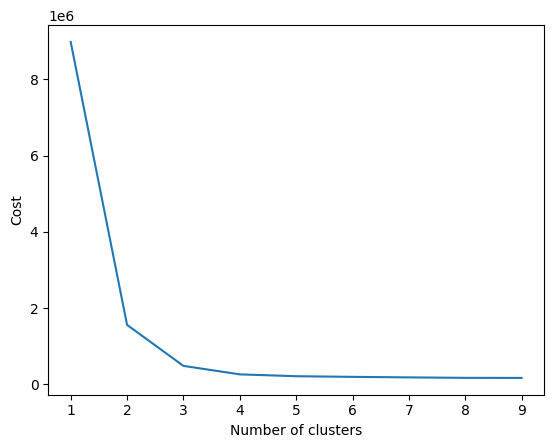

In [ ]:
# Elbow plot
cost = []
max_clusters = 10
for num_clusters in range(1, max_clusters):
    kproto = KPrototypes(n_jobs = -1, n_clusters=num_clusters, init='Huang', verbose=2, max_iter=100, random_state = 0)
    kproto.fit(X_scaled, categorical=[0,1,2,6,7,8,9,10,11,12,13,14,15,16,18,19])
    cost.append(kproto.cost_)

plt.plot(range(1, max_clusters), cost)
plt.xticks(range(1, max_clusters))
plt.xlabel("Number of clusters")
plt.ylabel("Cost")
plt.show()

De la gráfica se concluye el uso de 3 clusters. Se corre de nuevo el método K-prototype con este numero de clusters.

In [ ]:
num_clusters = 3

kproto = KPrototypes(n_jobs = -1, n_clusters=num_clusters, init='Huang', verbose=2, max_iter=100, random_state = 0)
kproto.fit(X_scaled, categorical=[0,1,2,6,7,8,9,10,11,12,13,14,15,16,18,19])
labels = kproto.predict(X_scaled, categorical=[0,1,2,6,7,8,9,10,11,12,13,14,15,16,18,19])

Best run was number 2


Se guardan los labels de los tres conglomerados y se añaden a un nuevo DataFrame para generar gráficas comparativas entre conglomerados y las variables o características que los definen.

In [ ]:
df_labels = pd.DataFrame(labels)
df_aux = pd.concat([df1, df_labels], axis = 1)
df_aux.rename(columns = {0:"Labels"}, inplace = True)

Se revisan los centroides

In [ ]:
kproto.cluster_centroids_

array([[1.12007961e-02, 8.86367880e-01, 1.06644538e+02, 1.84873950e-02,
        1.73913043e-01, 6.62251656e-03, 0.00000000e+00, 1.00000000e+00,
        2.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 6.00000000e+00, 2.00000000e+00],
       [2.22071665e-02, 8.77279267e-01, 1.16260163e+01, 2.92080699e-02,
        2.02898551e-01, 6.62251656e-03, 1.11111111e-01, 1.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 6.00000000e+00, 2.00000000e+00],
       [1.73374613e-02, 8.78431373e-01, 6.08792157e+01, 4.54901961e-02,
        2.02898551e-01, 6.62251656e-03, 0.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.0000

Gráficas comparativas entre conglomerados y variables

In [ ]:
df_aux['Transporte_usado_dentro_del_departamento_map'] = df_aux['Transporte_usado_dentro_del_departamento'].map({ 1:'Vehículo propio', 2 : 'Vehículo de amigos o familiares', 3 : 'Transporte terrestre de excursiones y/o planes turísticos', 4 : 'Transporte terrestre intermunicipal', 5 : 'Alquiler de vehículo', 6 : 'Transporte terrestre de pasajero', 7 : 'Vehículo del trabajo', 8 : 'Aéreo', 9 : 'A pie', 10 : 'Transporte con base a plataformas colaborativas', 11 : 'Autoestop (Pedir aventón)'})
df_aux.head()

,Departamento_del_visitante,Motivo_principal_del_viaje,Genero,Edad,Noches_de_visita,N_de_municipios_visitados,Actividades_Artisticas_culturales,Visitar_Parques_Sitios_Naturales,Visitar_lugares_tematicos,Visitar_casinos_juegos_de_azar,...,Turistas,Gasto_Total,Nivel_de_satisfaccio,A3_2_nombre_pais_esp,A3_1_nombre_dpto,A3_1_nombre_ciudad,lugar_residencia_km,Alojamiento_Utilizado,Labels,Transporte_usado_dentro_del_departamento_map
0,15,2,2,39,4,4,0,1,0,0,...,2,750000,10,Colombia,Boyacá,Moniquirá,178.1,1,1,Transporte terrestre de pasajero
1,15,1,2,61,1,5,1,1,0,0,...,4,350000,8,Colombia,Boyacá,Moniquirá,178.1,2,1,Vehículo propio
2,15,1,2,72,3,1,0,1,0,0,...,2,850000,9,Colombia,Boyacá,Moniquirá,178.1,2,1,Vehículo propio
3,15,3,1,30,0,1,0,1,0,0,...,1,190000,8,Colombia,Boyacá,Moniquirá,178.1,16,1,Transporte terrestre de pasajero
4,15,1,2,34,1,2,0,1,0,0,...,2,600000,10,Colombia,Boyacá,Moniquirá,178.1,2,1,Vehículo propio


In [ ]:
df_p=df_aux['Transporte_usado_dentro_del_departamento']

In [ ]:
df_p.unique()

array([ 6,  1,  2,  4,  3,  5,  9, 10,  7, 11])

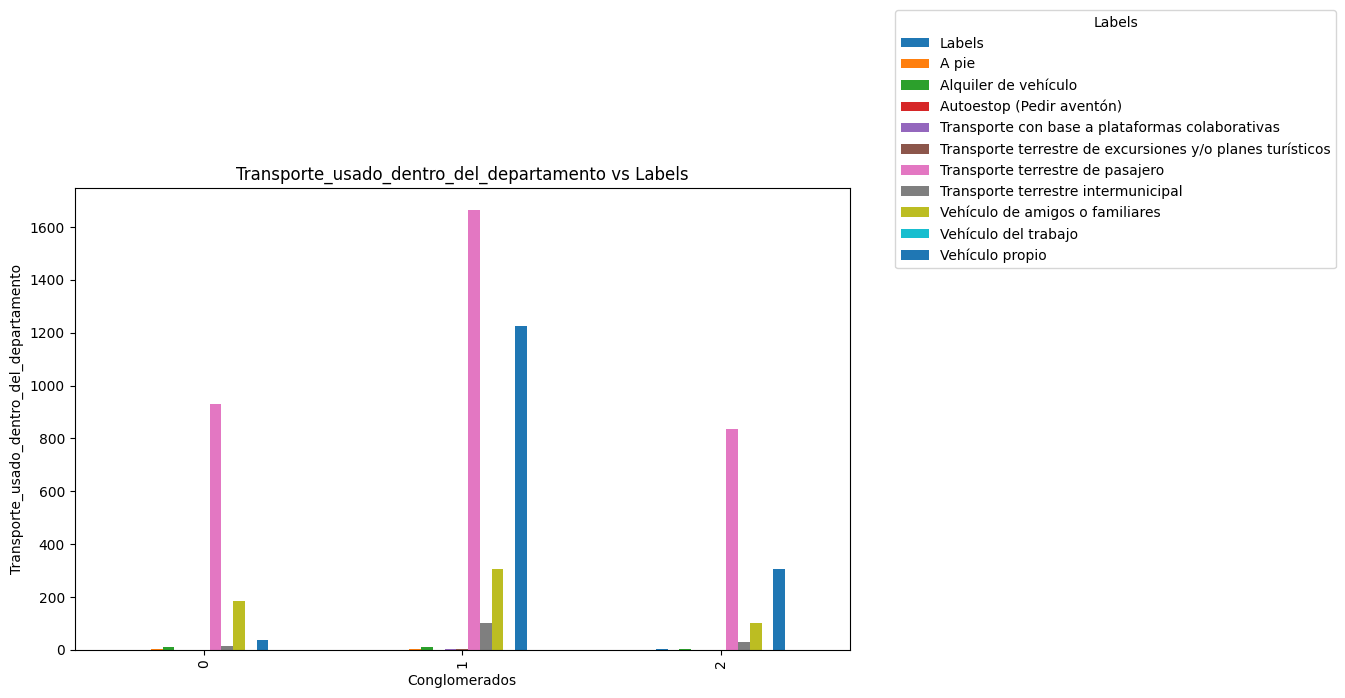

In [ ]:
pv_table_data=pd.pivot_table(df_aux,index="Labels",columns='Transporte_usado_dentro_del_departamento_map',values=["Edad"],aggfunc='count').rename(columns = {"Edad":"Conteo"})
pv_table_data.columns = pv_table_data.columns.droplevel(0)
pv_table_data=pv_table_data.reset_index() #.loc[:,~pv_table_data.columns.isin(["Labels"])]

fig, ax = plt.subplots(figsize=(10,6))
pv_table_data.plot.bar(ax = ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel("Conglomerados")
ax.set_ylabel('Transporte_usado_dentro_del_departamento')
ax.set_title('Transporte_usado_dentro_del_departamento' + " vs "+"Labels")
ax.legend(title="Labels", bbox_to_anchor=(1.05, 1.4), loc="upper left")
plt.show()

In [ ]:
df_aux['Actividades_Relacionadas_Deporte_map'] = df_aux['Actividades_Relacionadas_Deporte'].map({ 0:'No realizó', 1 : 'Si realizo'})
df_aux.head()

,Departamento_del_visitante,Motivo_principal_del_viaje,Genero,Edad,Noches_de_visita,N_de_municipios_visitados,Actividades_Artisticas_culturales,Visitar_Parques_Sitios_Naturales,Visitar_lugares_tematicos,Visitar_casinos_juegos_de_azar,...,Gasto_Total,Nivel_de_satisfaccio,A3_2_nombre_pais_esp,A3_1_nombre_dpto,A3_1_nombre_ciudad,lugar_residencia_km,Alojamiento_Utilizado,Labels,Transporte_usado_dentro_del_departamento_map,Actividades_Relacionadas_Deporte_map
0,15,2,2,39,4,4,0,1,0,0,...,750000,10,Colombia,Boyacá,Moniquirá,178.1,1,1,Transporte terrestre de pasajero,No realizó
1,15,1,2,61,1,5,1,1,0,0,...,350000,8,Colombia,Boyacá,Moniquirá,178.1,2,1,Vehículo propio,No realizó
2,15,1,2,72,3,1,0,1,0,0,...,850000,9,Colombia,Boyacá,Moniquirá,178.1,2,1,Vehículo propio,No realizó
3,15,3,1,30,0,1,0,1,0,0,...,190000,8,Colombia,Boyacá,Moniquirá,178.1,16,1,Transporte terrestre de pasajero,No realizó
4,15,1,2,34,1,2,0,1,0,0,...,600000,10,Colombia,Boyacá,Moniquirá,178.1,2,1,Vehículo propio,Si realizo


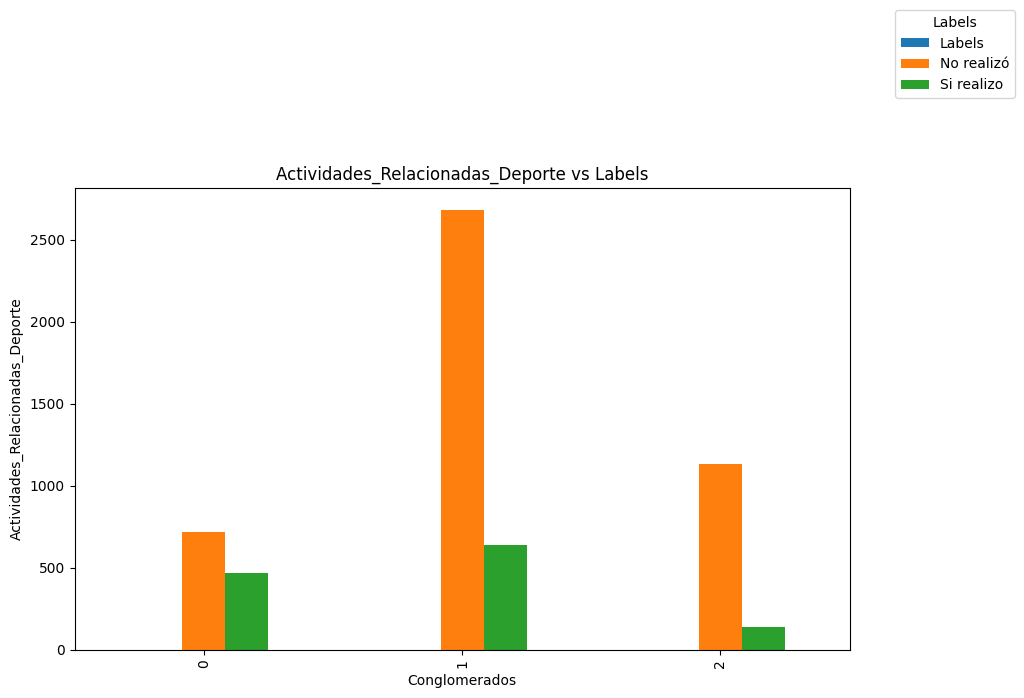

In [ ]:
pv_table_data=pd.pivot_table(df_aux,index="Labels",columns='Actividades_Relacionadas_Deporte_map',values=["Edad"],aggfunc='count').rename(columns = {"Edad":"Conteo"})
pv_table_data.columns = pv_table_data.columns.droplevel(0)
pv_table_data=pv_table_data.reset_index() #.loc[:,~pv_table_data.columns.isin(["Labels"])]

fig, ax = plt.subplots(figsize=(10,6))
pv_table_data.plot.bar(ax = ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel("Conglomerados")
ax.set_ylabel('Actividades_Relacionadas_Deporte')
ax.set_title('Actividades_Relacionadas_Deporte' + " vs "+"Labels")
ax.legend(title="Labels", bbox_to_anchor=(1.05, 1.4), loc="upper left")
plt.show()

In [ ]:
df_aux['Compras_map'] = df_aux['Compras'].map({ 0:'No realizó', 1 : 'Si realizo'})
df_aux.head()

,Departamento_del_visitante,Motivo_principal_del_viaje,Genero,Edad,Noches_de_visita,N_de_municipios_visitados,Actividades_Artisticas_culturales,Visitar_Parques_Sitios_Naturales,Visitar_lugares_tematicos,Visitar_casinos_juegos_de_azar,...,Nivel_de_satisfaccio,A3_2_nombre_pais_esp,A3_1_nombre_dpto,A3_1_nombre_ciudad,lugar_residencia_km,Alojamiento_Utilizado,Labels,Transporte_usado_dentro_del_departamento_map,Actividades_Relacionadas_Deporte_map,Compras_map
0,15,2,2,39,4,4,0,1,0,0,...,10,Colombia,Boyacá,Moniquirá,178.1,1,1,Transporte terrestre de pasajero,No realizó,Si realizo
1,15,1,2,61,1,5,1,1,0,0,...,8,Colombia,Boyacá,Moniquirá,178.1,2,1,Vehículo propio,No realizó,Si realizo
2,15,1,2,72,3,1,0,1,0,0,...,9,Colombia,Boyacá,Moniquirá,178.1,2,1,Vehículo propio,No realizó,No realizó
3,15,3,1,30,0,1,0,1,0,0,...,8,Colombia,Boyacá,Moniquirá,178.1,16,1,Transporte terrestre de pasajero,No realizó,No realizó
4,15,1,2,34,1,2,0,1,0,0,...,10,Colombia,Boyacá,Moniquirá,178.1,2,1,Vehículo propio,Si realizo,Si realizo


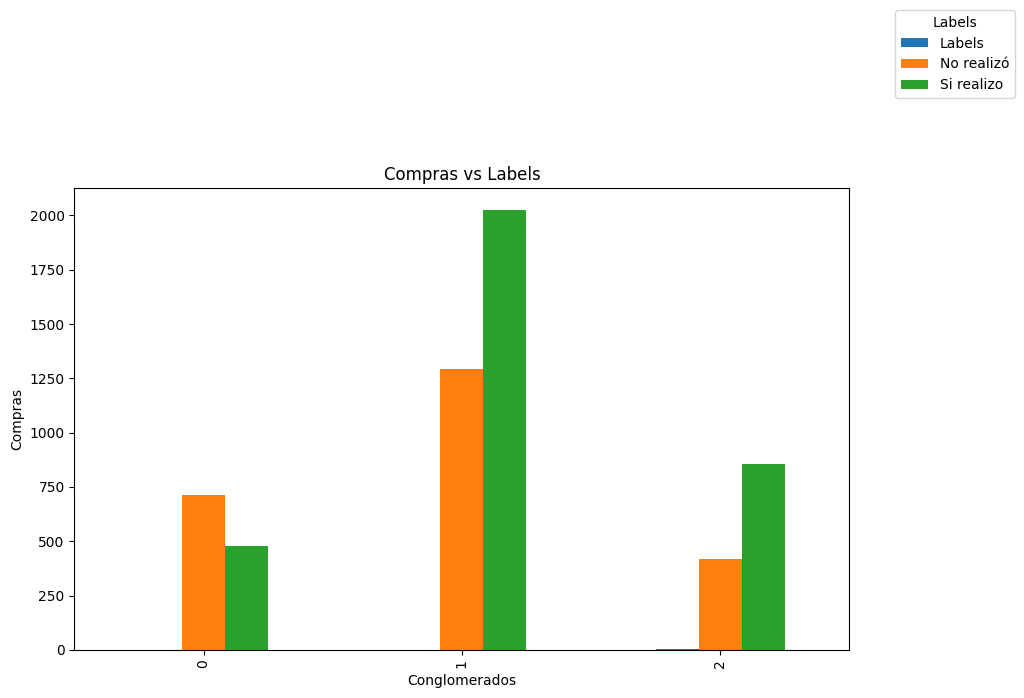

In [ ]:
pv_table_data=pd.pivot_table(df_aux,index="Labels",columns='Compras_map',values=["Edad"],aggfunc='count').rename(columns = {"Edad":"Conteo"})
pv_table_data.columns = pv_table_data.columns.droplevel(0)
pv_table_data=pv_table_data.reset_index() #.loc[:,~pv_table_data.columns.isin(["Labels"])]

fig, ax = plt.subplots(figsize=(10,6))
pv_table_data.plot.bar(ax = ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel("Conglomerados")
ax.set_ylabel('Compras')
ax.set_title('Compras' + " vs "+"Labels")
ax.legend(title="Labels", bbox_to_anchor=(1.05, 1.4), loc="upper left")
plt.show()

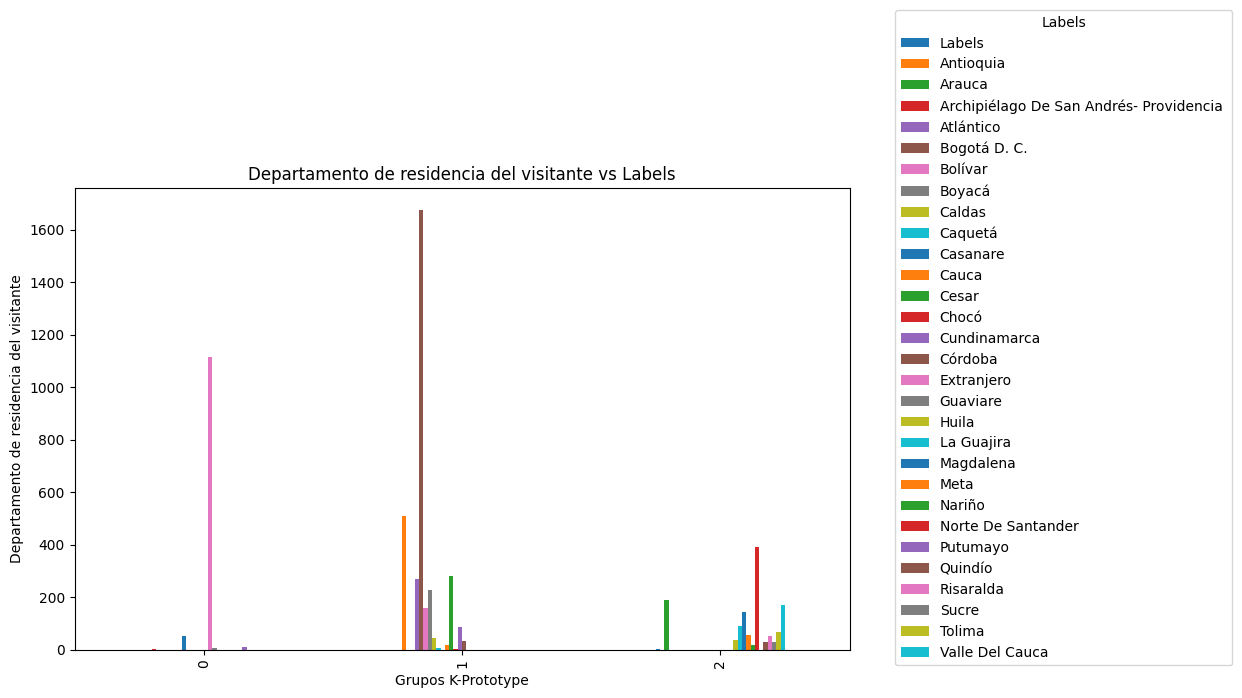

In [ ]:
pv_table_data=pd.pivot_table(df_aux,index="Labels",columns='A3_1_nombre_dpto',values=["Edad"],aggfunc='count').rename(columns = {"Edad":"Conteo"})
pv_table_data.columns = pv_table_data.columns.droplevel(0)
pv_table_data=pv_table_data.reset_index() #.loc[:,~pv_table_data.columns.isin(["Labels"])]

fig, ax = plt.subplots(figsize=(10,6))
pv_table_data.plot.bar(ax = ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel("Grupos K-Prototype")
ax.set_ylabel('Departamento de residencia del visitante')
ax.set_title('Departamento de residencia del visitante' + " vs "+"Labels")
ax.legend(title="Labels", bbox_to_anchor=(1.05, 1.4), loc="upper left")
plt.show()

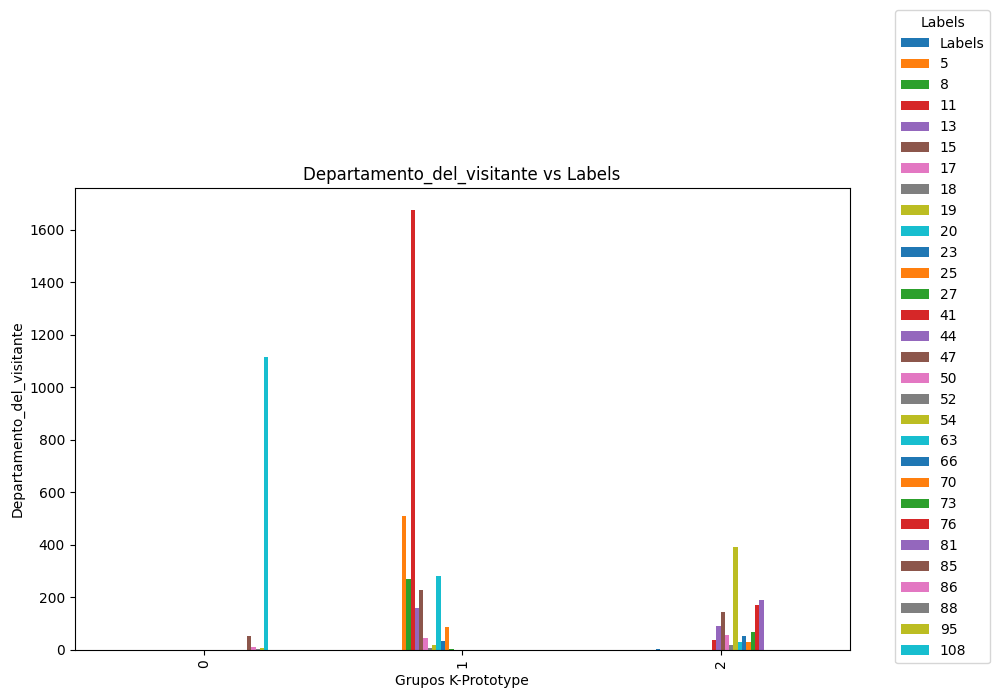

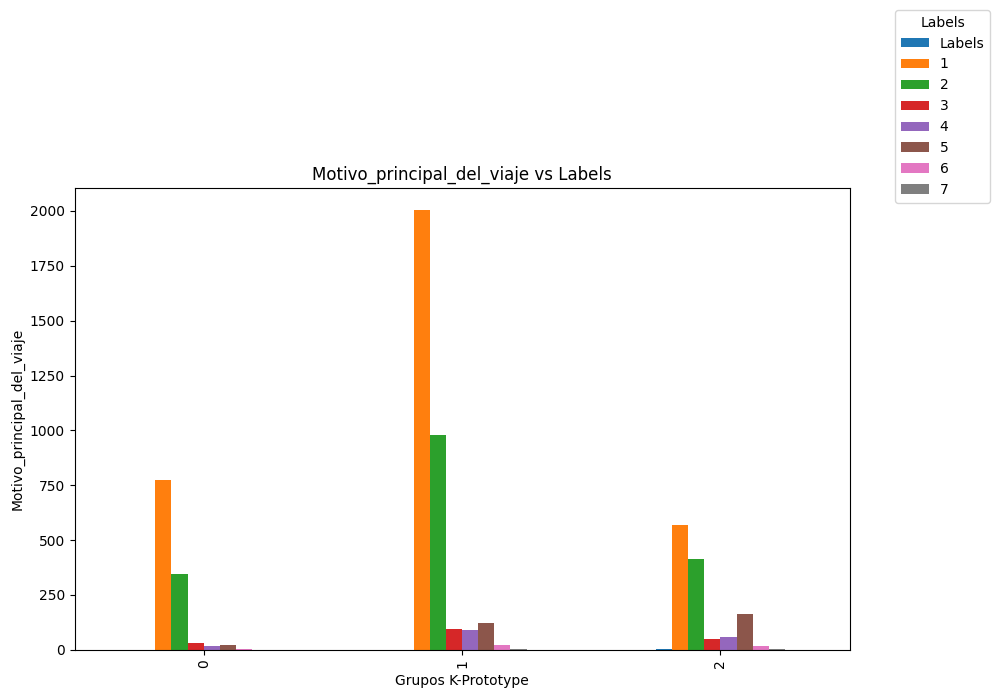

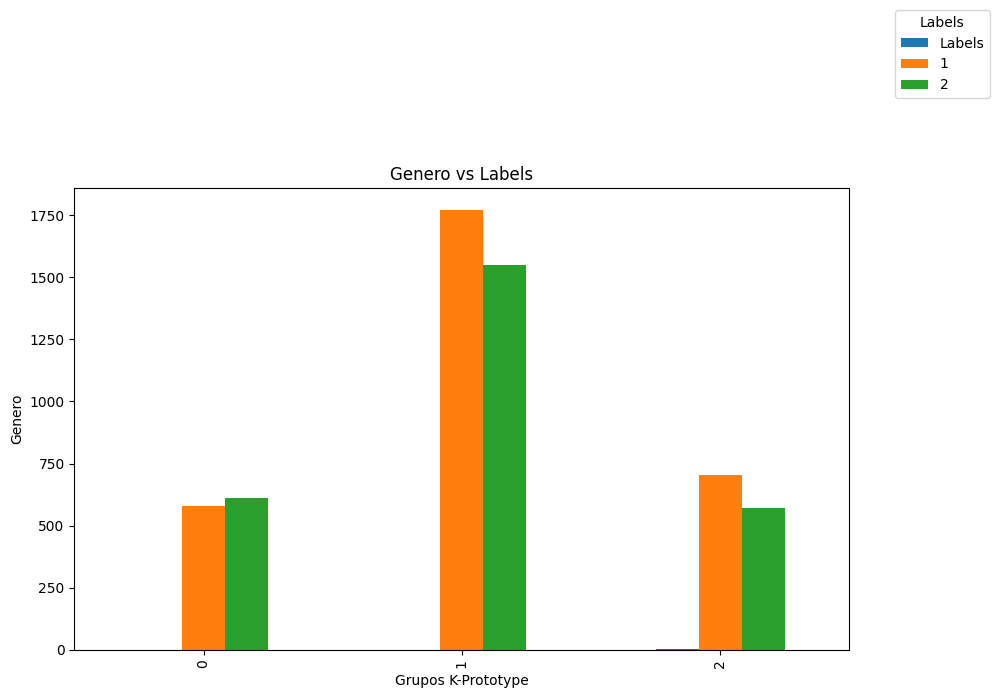

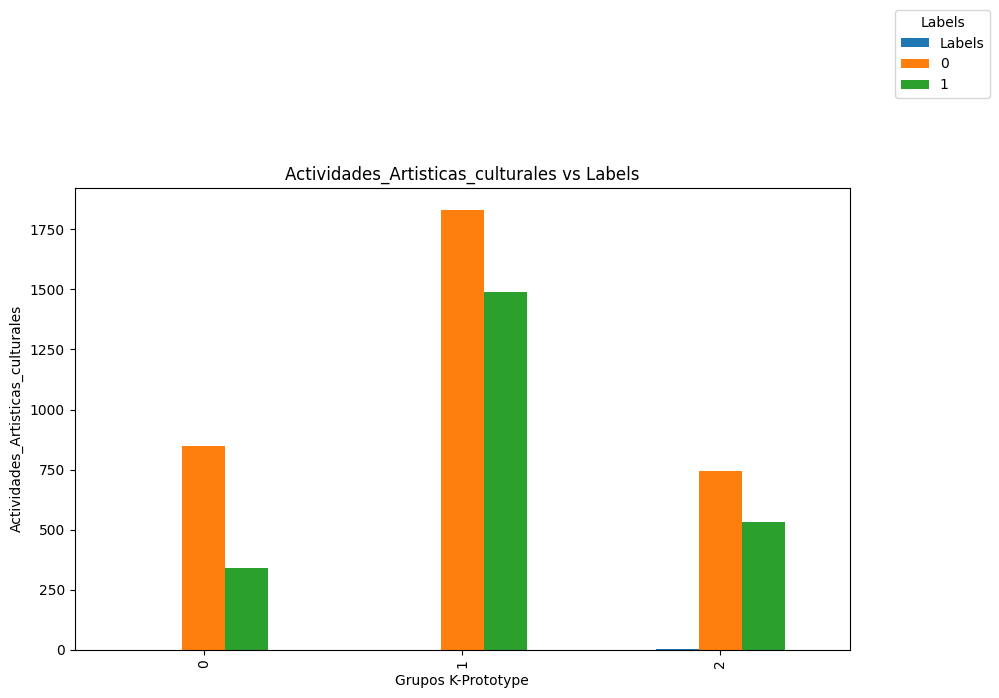

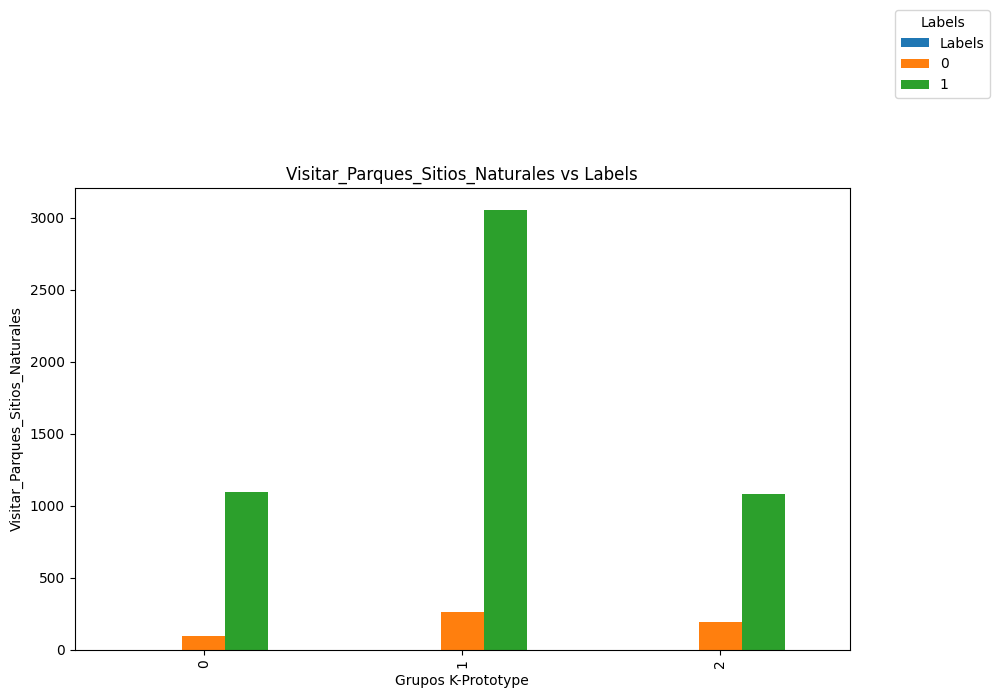

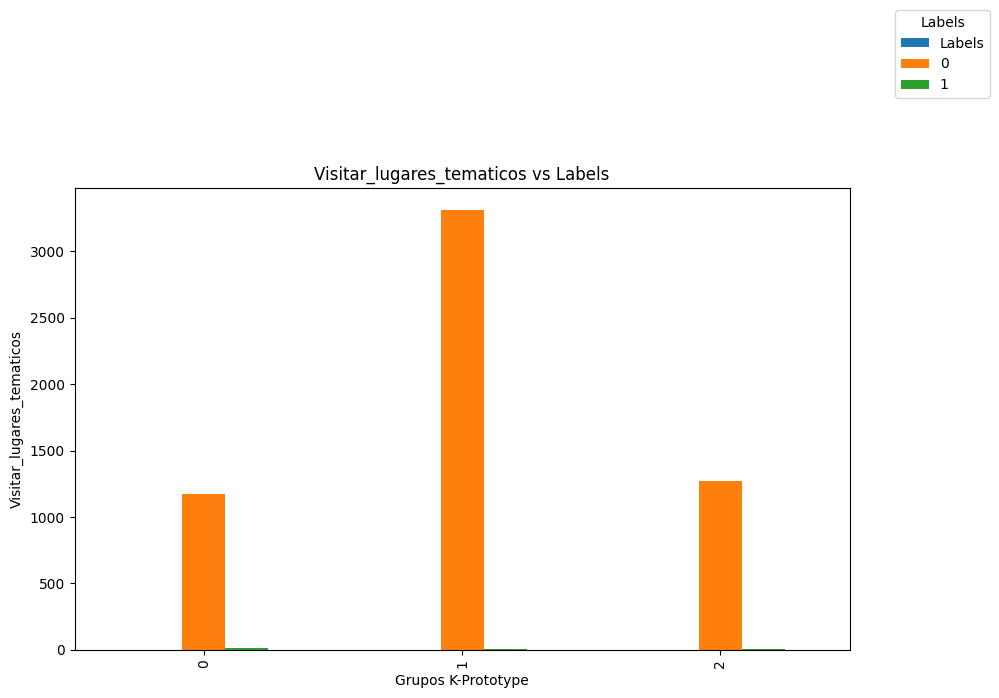

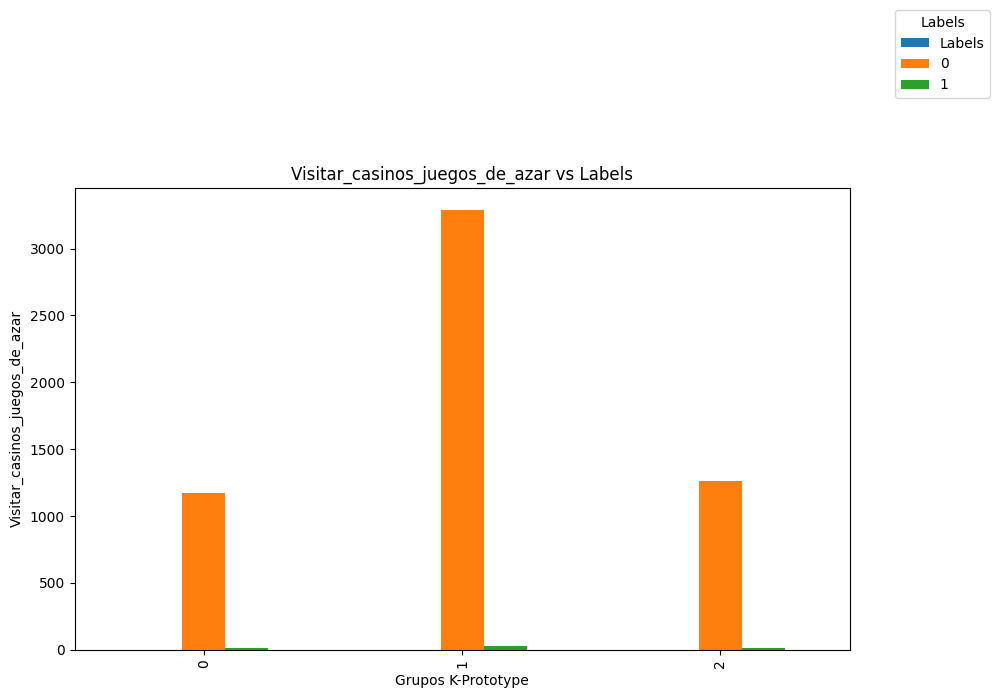

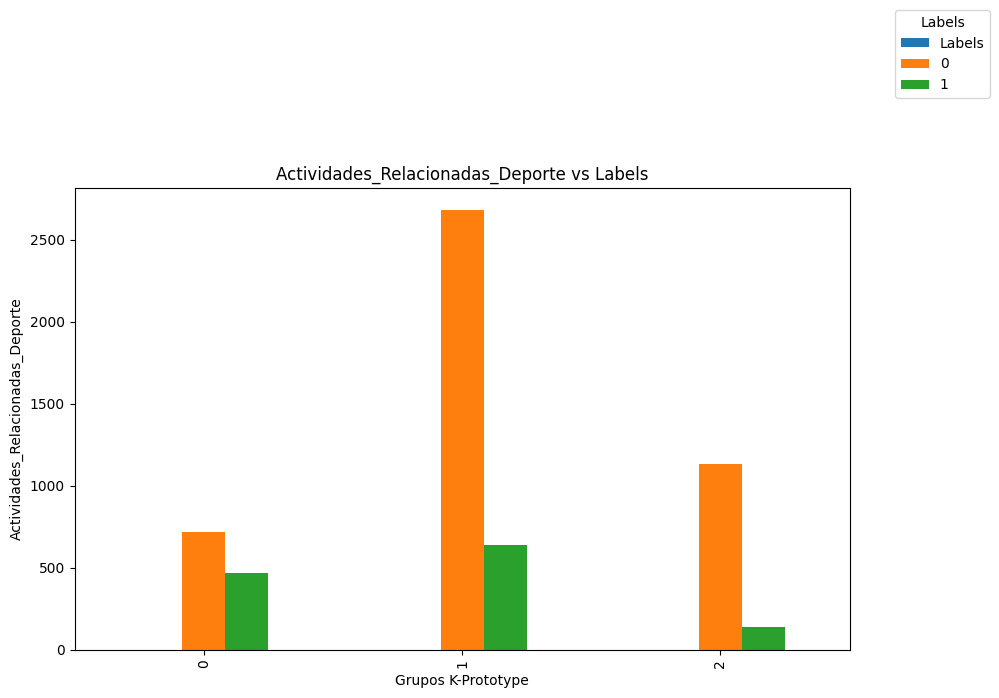

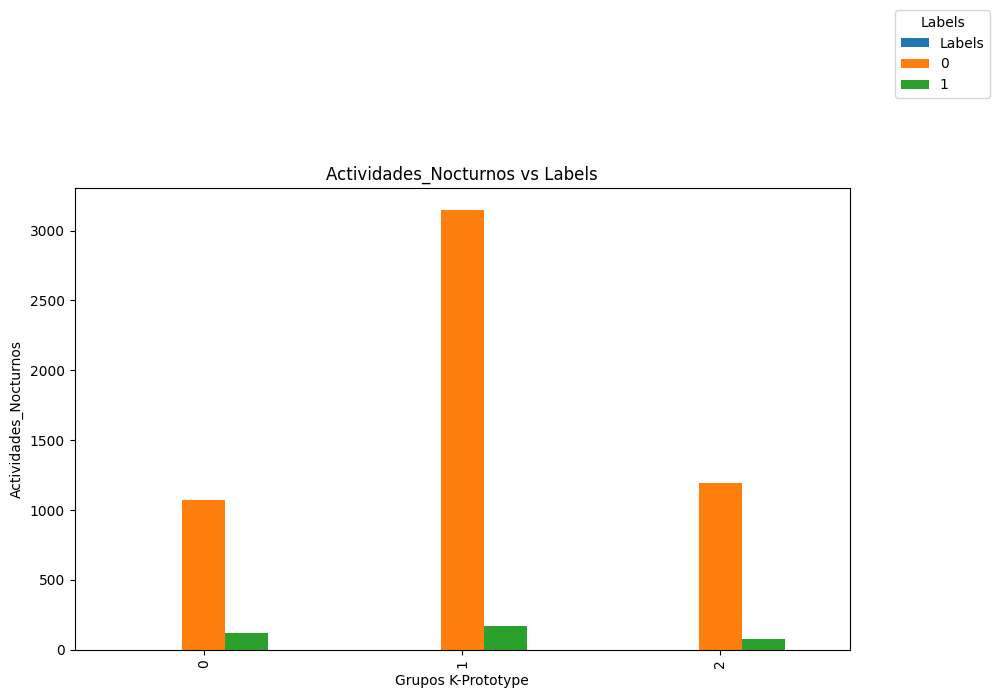

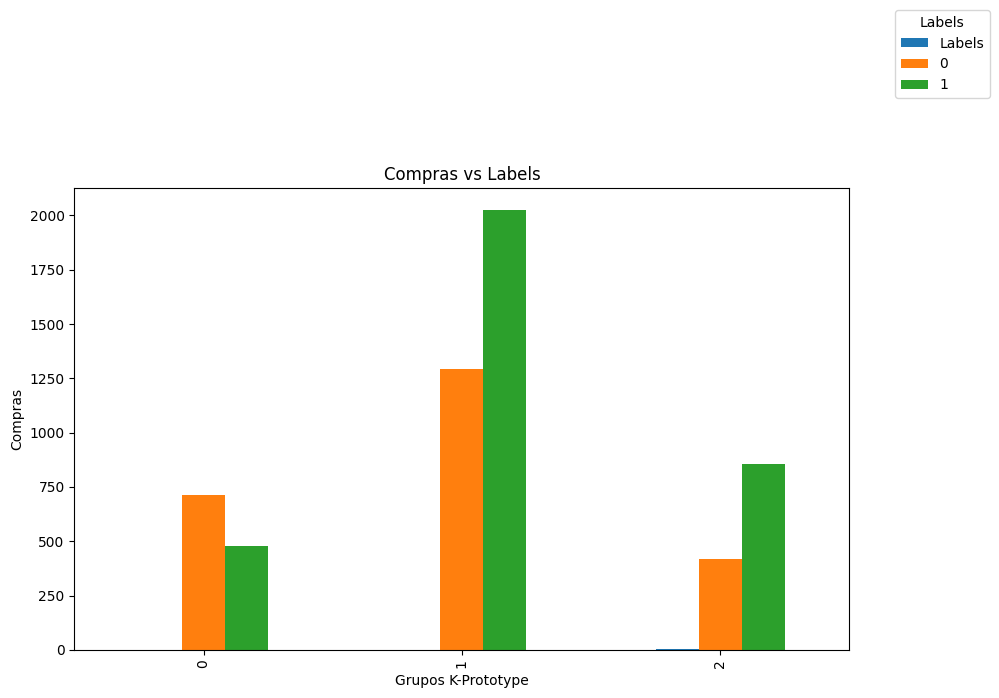

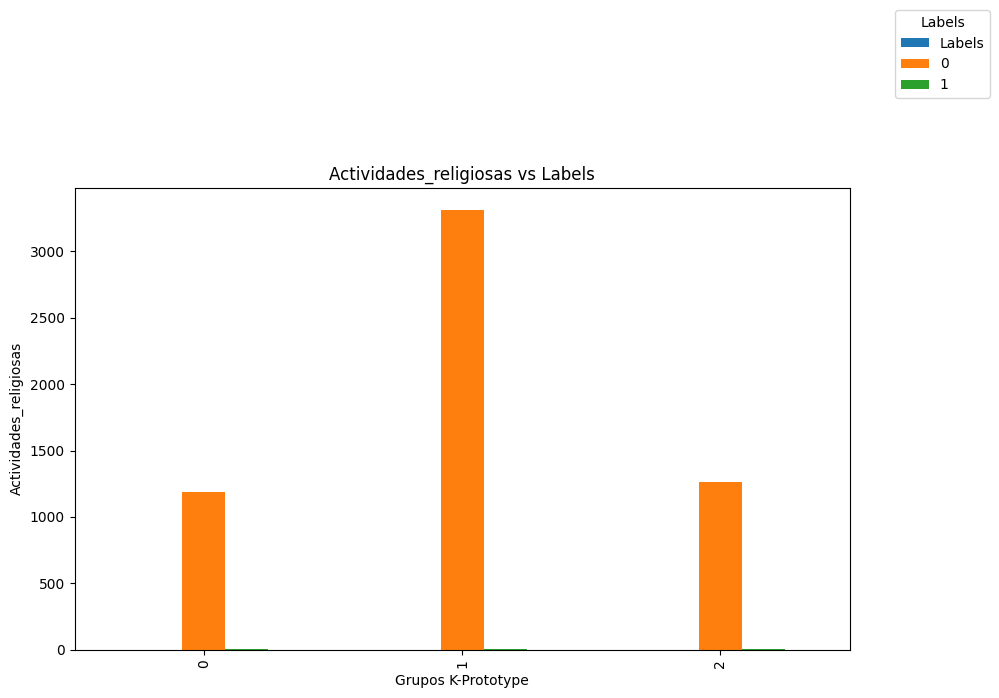

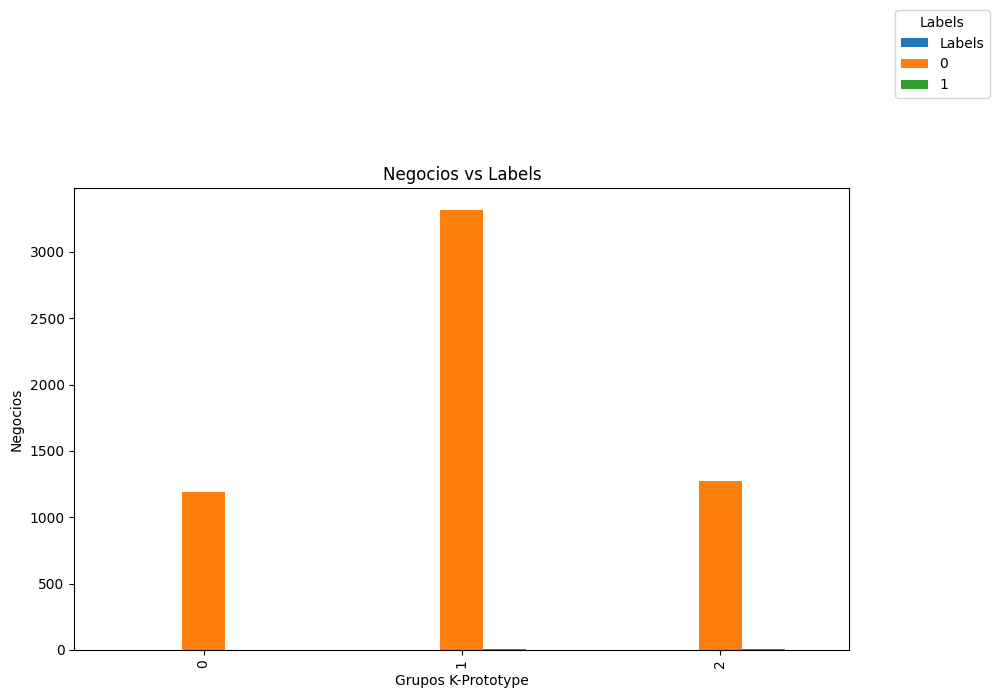

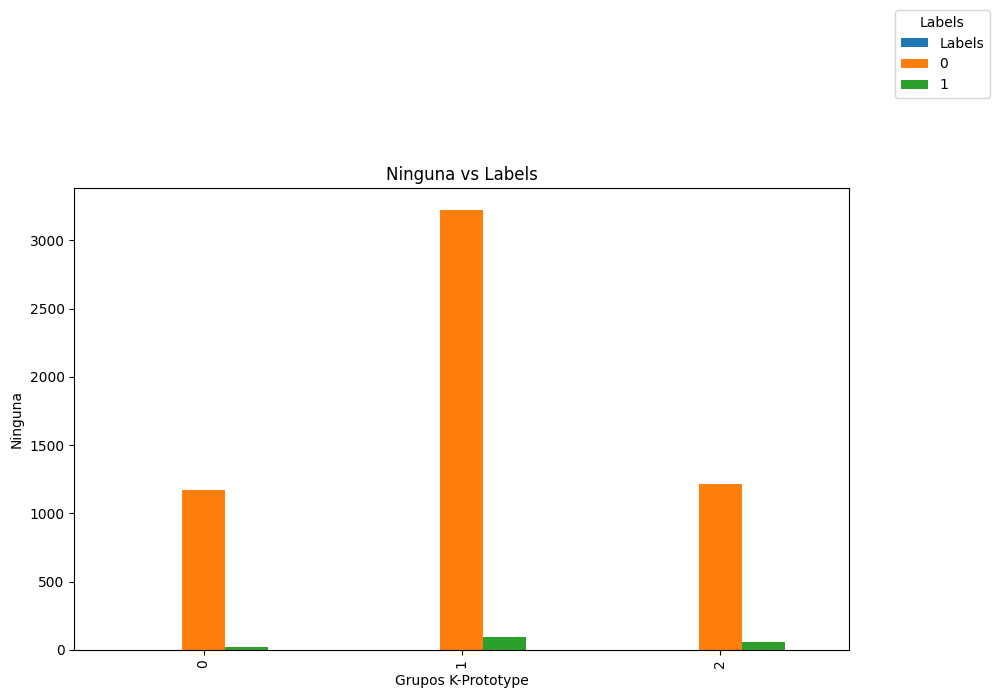

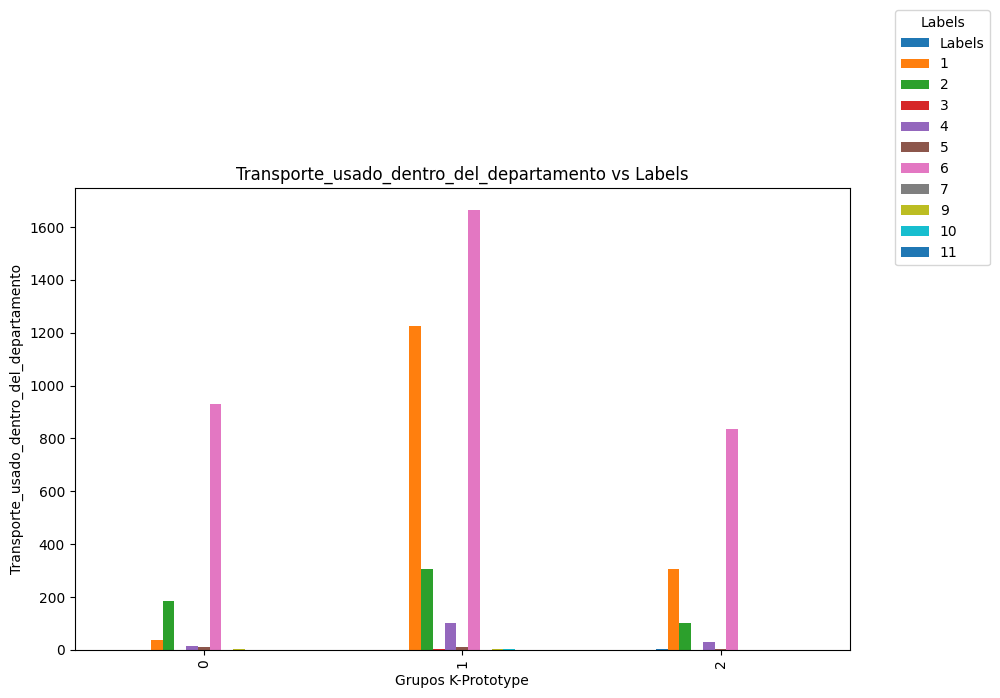

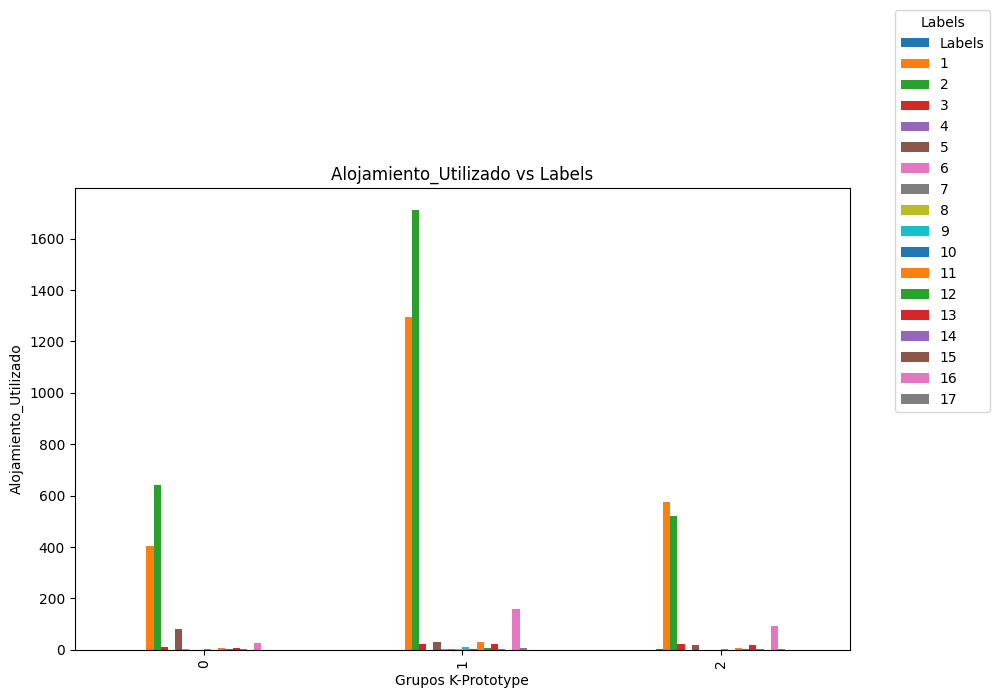

In [ ]:
%matplotlib inline
for i in df_aux[["Departamento_del_visitante","Motivo_principal_del_viaje","Genero","Actividades_Artisticas_culturales","Visitar_Parques_Sitios_Naturales", "Visitar_lugares_tematicos","Visitar_casinos_juegos_de_azar","Actividades_Relacionadas_Deporte", "Actividades_Nocturnos",  "Compras","Actividades_religiosas","Negocios",  "Ninguna","Transporte_usado_dentro_del_departamento","Alojamiento_Utilizado"]].columns:

    pv_table_data=pd.pivot_table(df_aux,index="Labels",columns=i,values=["Edad"],aggfunc='count').rename(columns = {"Edad":"Conteo"})
    pv_table_data.columns = pv_table_data.columns.droplevel(0)
    pv_table_data=pv_table_data.reset_index() #.loc[:,~pv_table_data.columns.isin(["Labels"])]

    fig, ax = plt.subplots(figsize=(10,6))
    pv_table_data.plot.bar(ax = ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_xlabel("Grupos K-Prototype")
    ax.set_ylabel(i)
    ax.set_title(i + " vs "+"Labels")
    ax.legend(title="Labels", bbox_to_anchor=(1.05, 1.4), loc="upper left")
    plt.show()

<Axes: xlabel='Labels', ylabel='Edad'>

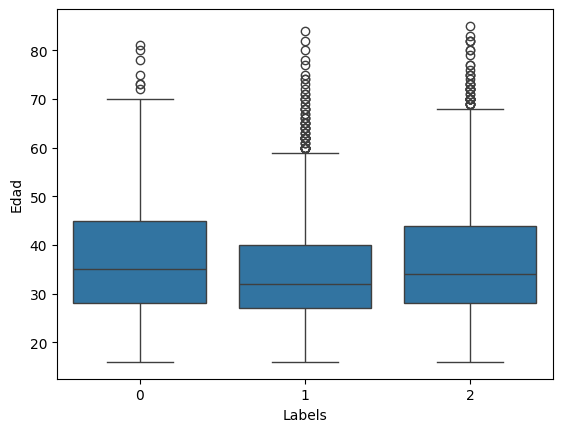

In [ ]:
sns.boxplot(data= df_aux, x="Labels", y="Edad")

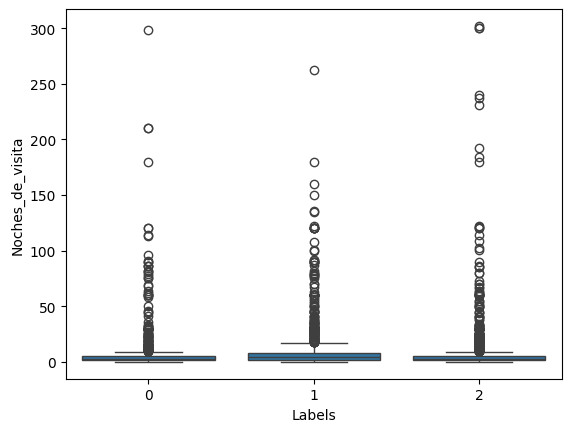

In [ ]:
sns.boxplot(data= df_aux, x="Labels", y="Noches_de_visita");

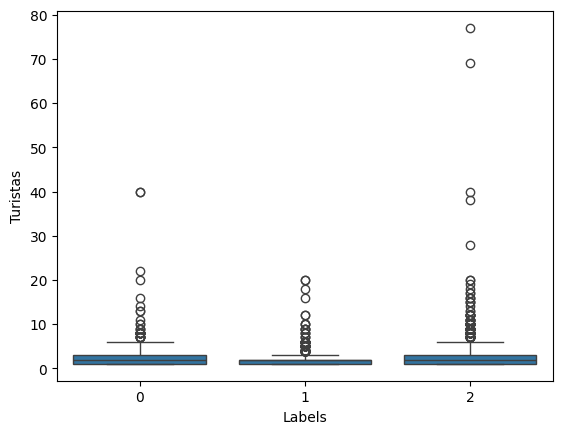

In [ ]:
sns.boxplot(data= df_aux, x="Labels", y="Turistas");

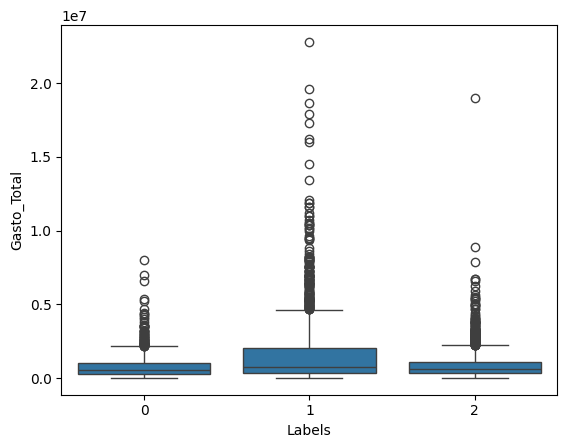

In [ ]:
sns.boxplot(data= df_aux, x="Labels", y="Gasto_Total");

In [ ]:
#-----------------fin-------------------

In [ ]:
# Load the data
df = pd.read_pickle("/content/turismoreceptorf1.pickle")

,Departamento_del_visitante,Motivo_principal_del_viaje,Genero,Edad,Noches_de_visita,N_de_municipios_visitados,Actividades_Artisticas_culturales,Visitar_Parques_Sitios_Naturales,Visitar_lugares_tematicos,Visitar_casinos_juegos_de_azar,...,Transporte_usado_para_llegar,Transporte_usado_dentro_del_departamento,Turistas,Gasto_Total,Nivel_de_satisfaccio,A3_2_nombre_pais_esp,A3_1_nombre_dpto,A3_1_nombre_ciudad,lugar_residencia_km,Alojamiento_Utilizado
0,15,2,2,39,4,4,0,1,0,0,...,6,6,2,750000,10,Colombia,Boyacá,Moniquirá,178.1,1
1,15,1,2,61,1,5,1,1,0,0,...,1,1,4,350000,8,Colombia,Boyacá,Moniquirá,178.1,2
2,15,1,2,72,3,1,0,1,0,0,...,1,1,2,850000,9,Colombia,Boyacá,Moniquirá,178.1,2
3,15,3,1,30,0,1,0,1,0,0,...,6,6,1,190000,8,Colombia,Boyacá,Moniquirá,178.1,16
4,15,1,2,34,1,2,0,1,0,0,...,1,1,2,600000,10,Colombia,Boyacá,Moniquirá,178.1,2


Convertir las variables categoricas a variables numericas usando LabelEncoder

In [ ]:
for col in df.columns:
    if df[col].dtype == "category":
        df[col] = LabelEncoder().fit_transform(df[col])

Dividir las variables independientes de la variable objetivos y estandizamos las variables númericas, seguido, volver a unirlas con las variables categoricas

In [ ]:
X = df.drop(["Transporte_usado_para_llegar","A3_2_nombre_pais_esp","A3_1_nombre_dpto","A3_1_nombre_ciudad","lugar_residencia_km","Gasto_Total"], axis=1)

scaler = MinMaxScaler().fit(X[["Edad","Noches_de_visita","N_de_municipios_visitados","Turistas","Nivel_de_satisfaccio"]].values)
X_scaled = scaler.transform(X[["Edad","Noches_de_visita","N_de_municipios_visitados","Turistas","Nivel_de_satisfaccio"]].values)

X_scaled = np.concatenate((X_scaled, X[["Departamento_del_visitante",
                                        "Motivo_principal_del_viaje",
                                        "Genero",
                                        "Actividades_Artisticas_culturales",
                                        "Visitar_Parques_Sitios_Naturales",
                                        "Visitar_lugares_tematicos",
                                        "Visitar_casinos_juegos_de_azar",
                                        "Actividades_Relacionadas_Deporte",
                                        "Actividades_Nocturnos",
                                        "Compras",
                                        "Actividades_religiosas",
                                        "Negocios",
                                        "Ninguna",
                                        "Transporte_usado_dentro_del_departamento",
                                        "Alojamiento_Utilizado"
                                       ]].values), axis=1)

Gráfica del codo para determinar que cantidad de clusters usar.

Best run was number 1
Best run was number 3
Best run was number 2
Best run was number 3
Best run was number 5
Best run was number 6
Best run was number 3
Best run was number 7
Best run was number 7


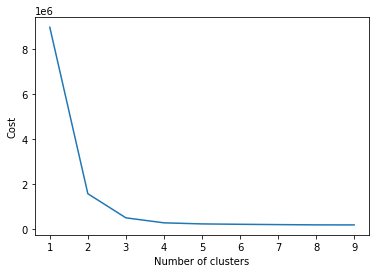

In [ ]:
# Elbow plot
cost = []
max_clusters = 10
for num_clusters in range(1, max_clusters):
    kproto = KPrototypes(n_jobs = -1, n_clusters=num_clusters, init='Huang', verbose=2, max_iter=100, random_state = 0)
    kproto.fit(X_scaled, categorical=[0,1,2,6,7,8,9,10,11,12,13,14,15,16,18,19])
    cost.append(kproto.cost_)

plt.plot(range(1, max_clusters), cost)
plt.xticks(range(1, max_clusters))
plt.xlabel("Number of clusters")
plt.ylabel("Cost")
plt.show()

De la grafica se concluye el uso de 3 clusters. Se corre de nuevo el método K-prototypes con este numero de clusters.

In [ ]:
num_clusters = 3

kproto = KPrototypes(n_jobs = -1, n_clusters=num_clusters, init='Huang', verbose=2, max_iter=100, random_state = 0)
kproto.fit(X_scaled, categorical=[0,1,2,6,7,8,9,10,11,12,13,14,15,16,18,19])
labels = kproto.predict(X_scaled, categorical=[0,1,2,6,7,8,9,10,11,12,13,14,15,16,18,19])



Best run was number 2


Guardar los labels y se añaden a un nuevo DataFrame para generar las graficas y comparar

In [ ]:
df_labels = pd.DataFrame(labels)
df_aux = pd.concat([df, df_labels], axis = 1)
df_aux.rename(columns = {0:"Labels"}, inplace = True)

Revisar los centroides

In [ ]:
kproto.cluster_centroids_

array([[1.12007961e-02, 8.86367880e-01, 1.06644538e+02, 1.84873950e-02,
        1.73913043e-01, 6.62251656e-03, 0.00000000e+00, 1.00000000e+00,
        2.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 6.00000000e+00, 2.00000000e+00],
       [2.22071665e-02, 8.77279267e-01, 1.16260163e+01, 2.92080699e-02,
        2.02898551e-01, 6.62251656e-03, 1.11111111e-01, 1.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 6.00000000e+00, 2.00000000e+00],
       [1.73374613e-02, 8.78431373e-01, 6.08792157e+01, 4.54901961e-02,
        2.02898551e-01, 6.62251656e-03, 0.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.0000

Graficar la relación de los clusters con cada una de las variables.

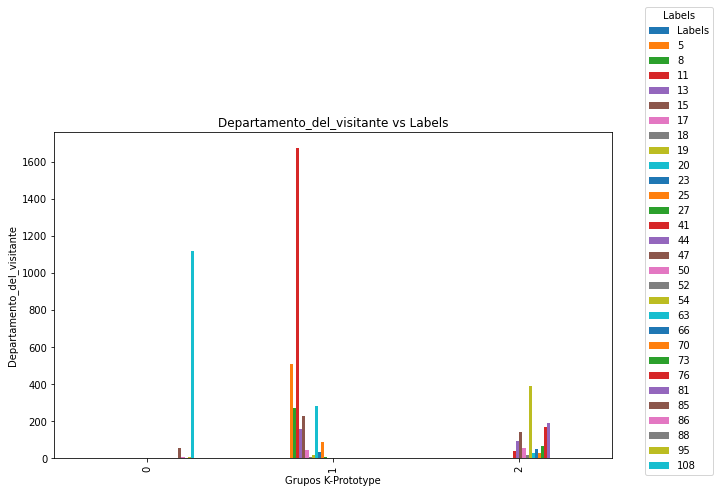

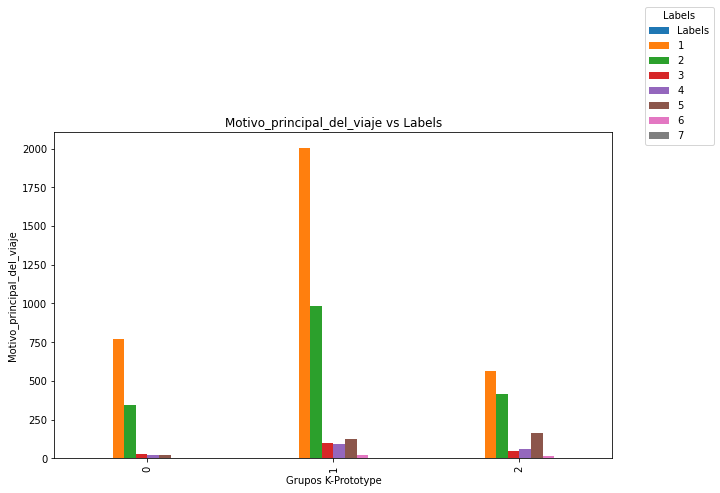

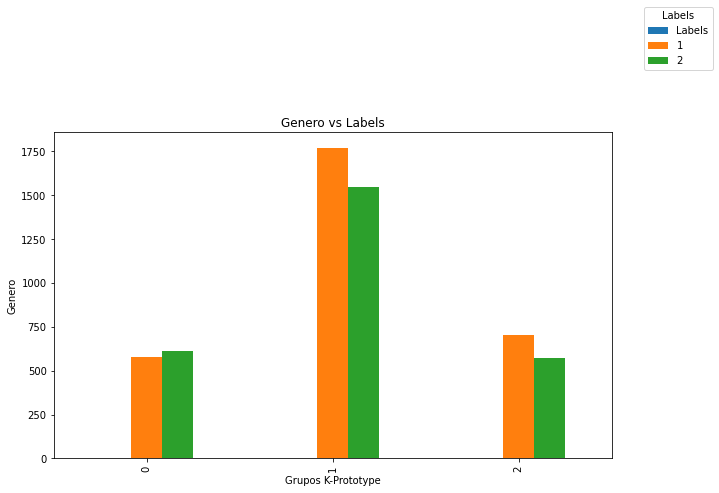

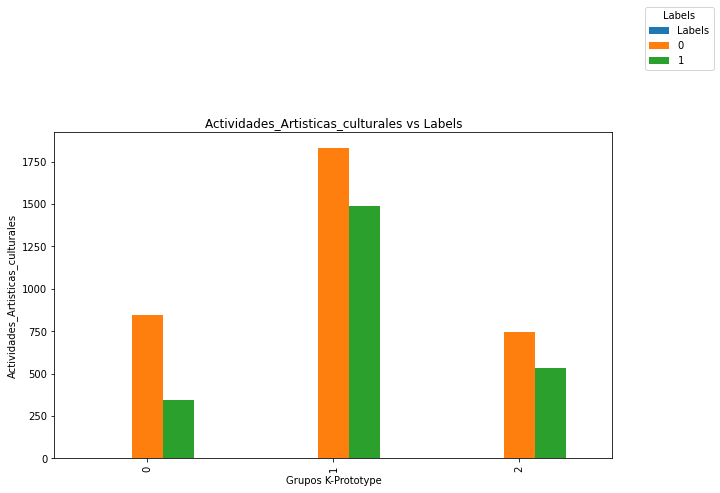

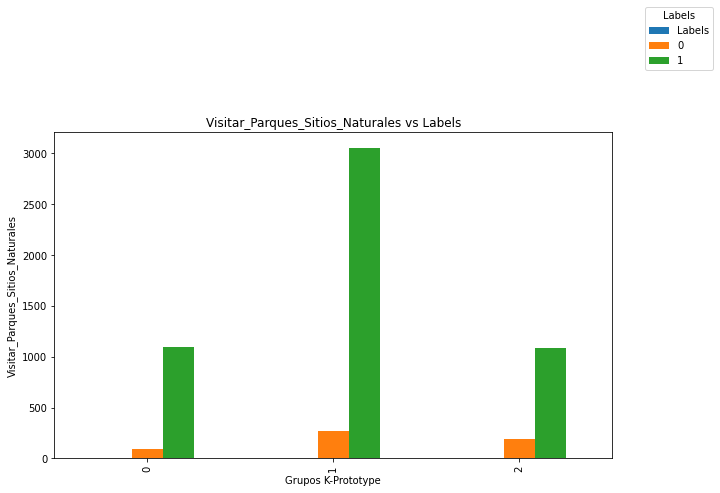

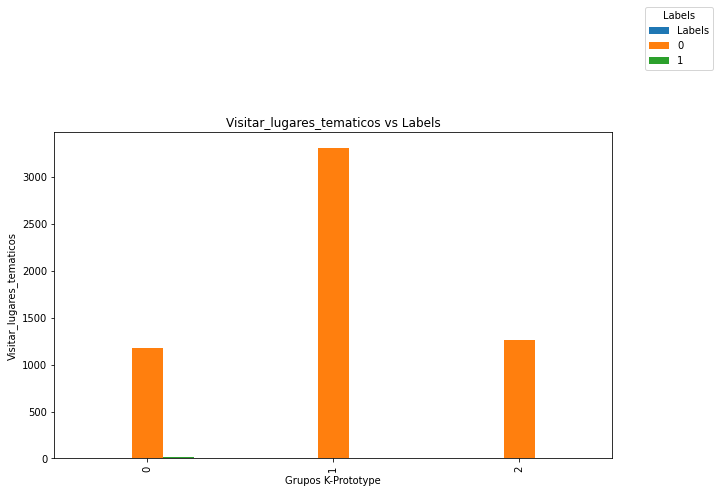

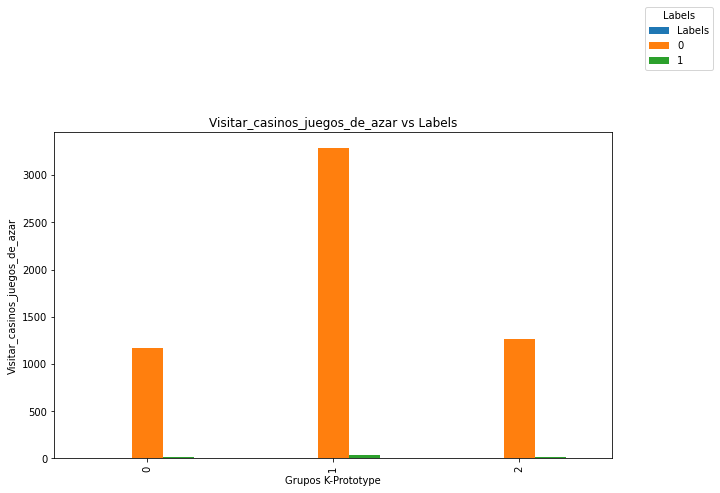

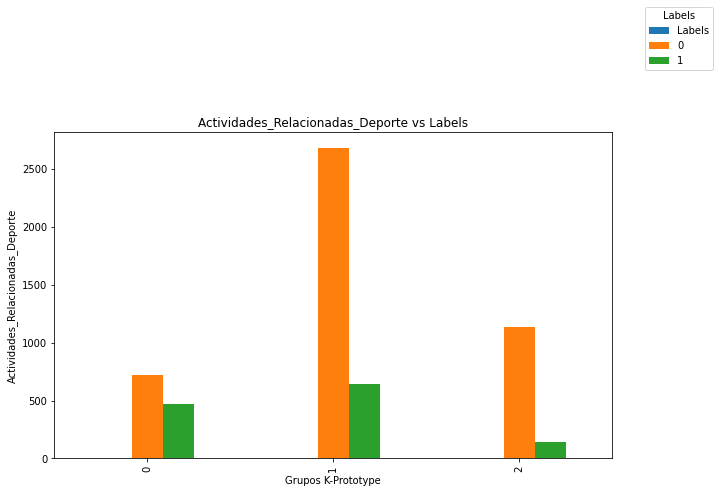

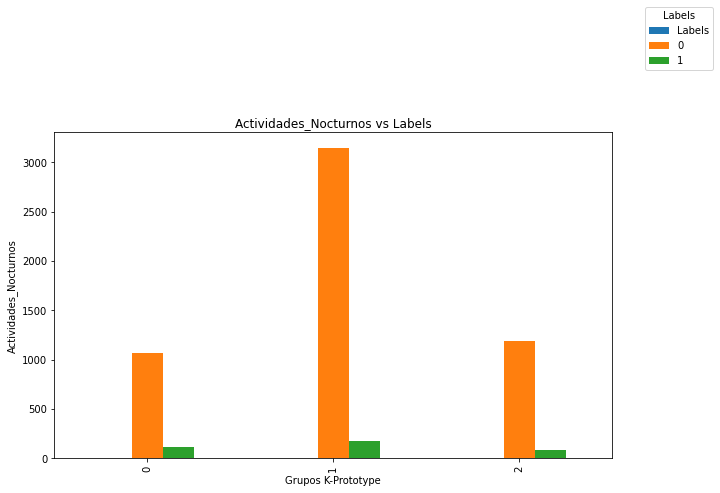

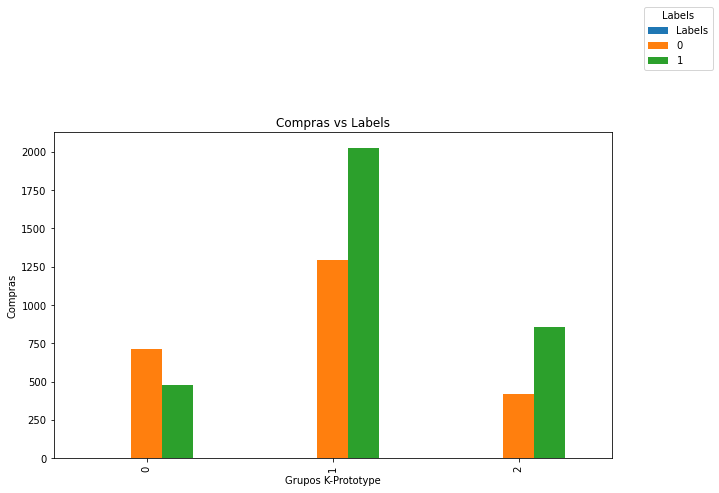

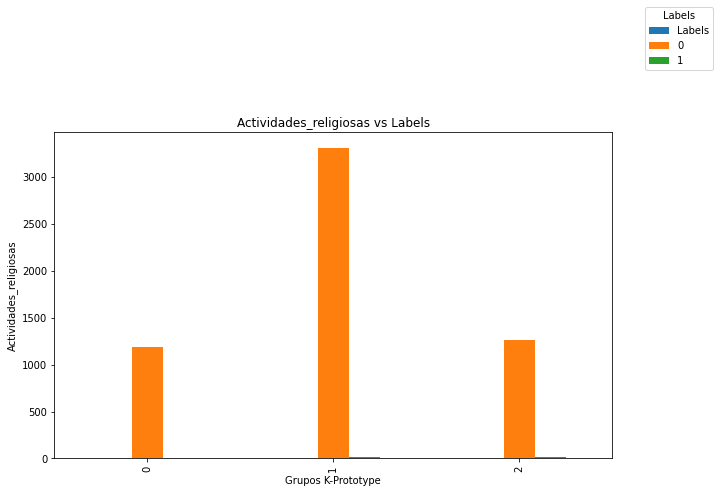

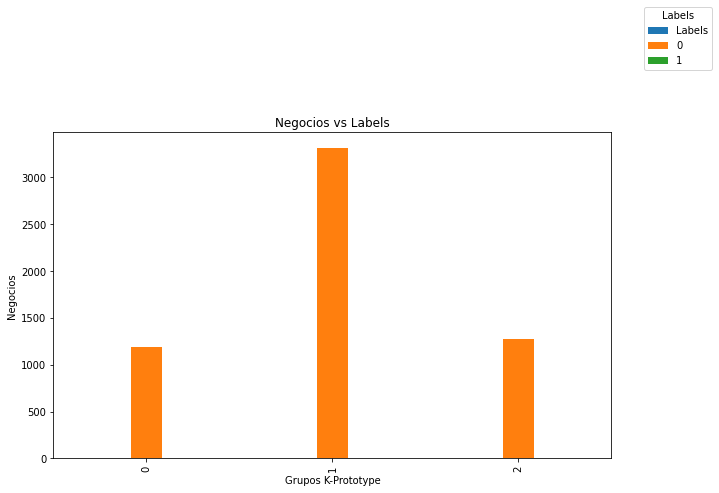

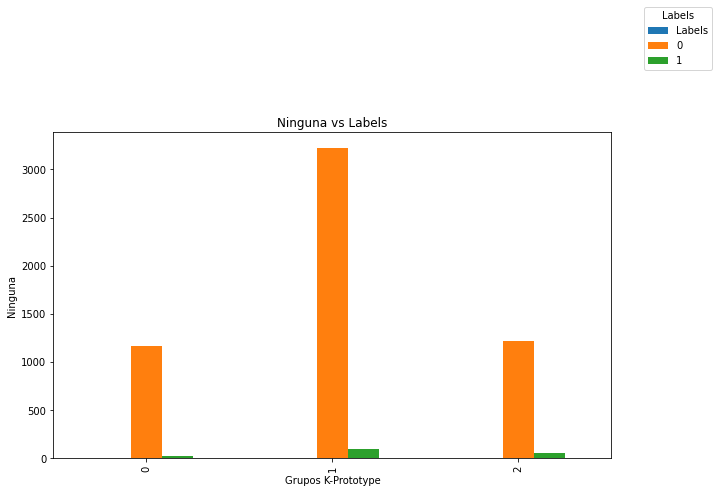

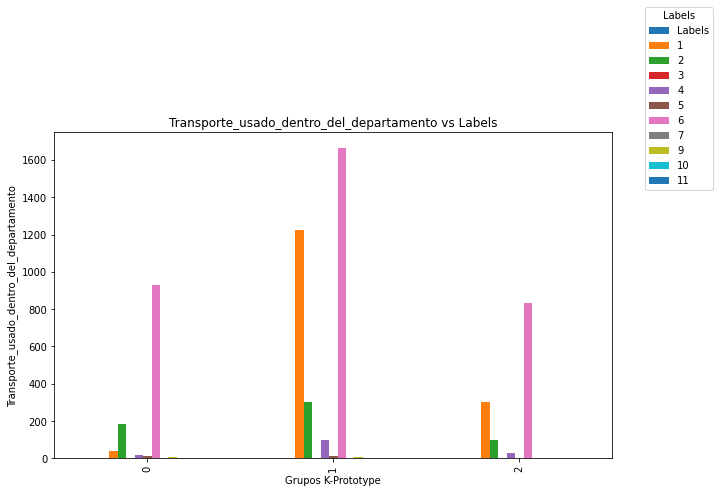

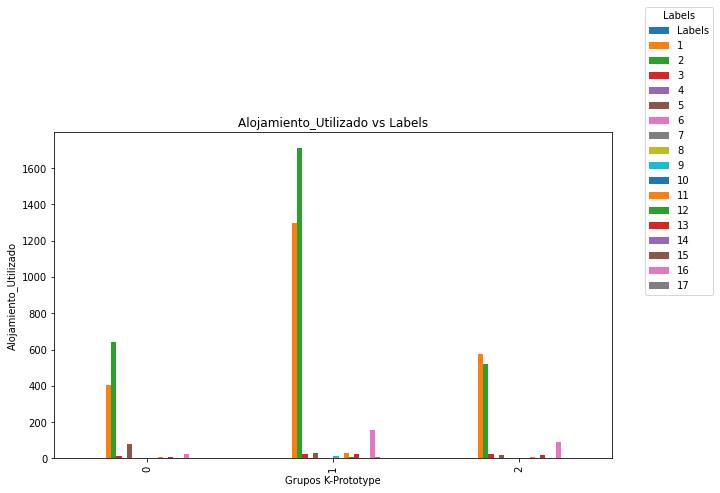

In [ ]:
%matplotlib inline
for i in df_aux[["Departamento_del_visitante","Motivo_principal_del_viaje","Genero","Actividades_Artisticas_culturales","Visitar_Parques_Sitios_Naturales", "Visitar_lugares_tematicos","Visitar_casinos_juegos_de_azar","Actividades_Relacionadas_Deporte", "Actividades_Nocturnos",  "Compras","Actividades_religiosas","Negocios",  "Ninguna","Transporte_usado_dentro_del_departamento","Alojamiento_Utilizado"]].columns:

    pv_table_data=pd.pivot_table(df_aux,index="Labels",columns=i,values=["Edad"],aggfunc='count').rename(columns = {"Edad":"Conteo"})
    pv_table_data.columns = pv_table_data.columns.droplevel(0)
    pv_table_data=pv_table_data.reset_index() #.loc[:,~pv_table_data.columns.isin(["Labels"])]

    fig, ax = plt.subplots(figsize=(10,6))
    pv_table_data.plot.bar(ax = ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_xlabel("Grupos K-Prototype")
    ax.set_ylabel(i)
    ax.set_title(i + " vs "+"Labels")
    ax.legend(title="Labels", bbox_to_anchor=(1.05, 1.4), loc="upper left")
    plt.show()

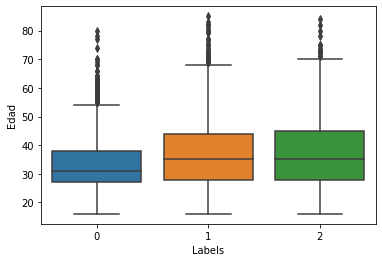

In [ ]:
sns.boxplot(data= df_aux, x="Labels", y="Edad")

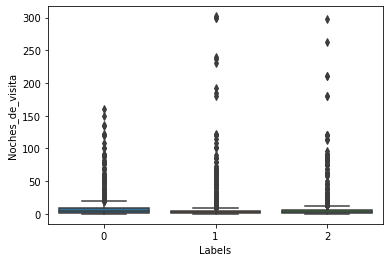

In [ ]:
sns.boxplot(data= df_aux, x="Labels", y="Noches_de_visita");

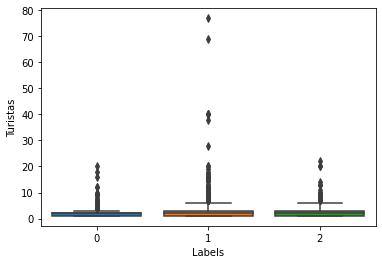

In [ ]:
sns.boxplot(data= df_aux, x="Labels", y="Turistas");

# **4. Conclusiones**

.Se observa en el análisis exploratorio que el gasto turístico se encuentra  concentrado en su media 1.100.000 (un millón cien mil pesos-COP) (curtosis 38.7, asimetria 4.9) y con sesgo a la derecha; presenta una cola de gastos atípicos >= 5.000.0000 (cinco millones de pesos-COP).

.Al comparar la distribución del gasto entre las varaibles explicativas propuestas como motivo principal del viaje, noches de estancia, actividades realizadas, etc, no hay cambios significativos en el gasto de manera global.

.El modelo de regresión lineal y el polinomial, no permiten predecir el gasto turístico en función de la variables independientes, teniendo en cuenta que el comportamiento de los valores predichos y de entrenamiento en los gráficos de dispersión no muestran una tendencian lineal o exponencial, respectivamente. Adicionalmente, los valores residuales tienen una tendencia decreciente según el gráfico de despersión. Y segun los coeficientes de determinación estos modelos explican 29.18% y el 49.70% de la variabilidad del gasto turístico con los datos de entrenamiento. Por lo tanto, no se evalua los modelos con los datos de prueba.

.Los modelos KNN y Random Forest, explican el 35.73% y 38.19% de la varianza del gasto turístico.

.Con respecto al análisis de conglomerados con K-prototype, agrupa los turistas en 3 conglomerados, perfilados en 4 variables en las cuales presentan diferencias.

Conglomerado 1: Extranjeros, consumidores de actividades deportivas y uso intensivo de transporte de pasajeros para movilizarse por Santander.

Conglomerado 2: Bogotanos, con alto interés en el turismo de compras y uso de vehículo propio para movilizarse por Santander.

Conglomerado 3: Nortesantandereanos, los vecinos más cercanos a Santander, se encuentran a 6 horas en carro de la capital del departamento Bucaramanga, estan interesados en realizar compras personales en Santander y se movilizan en transporte terrestre de pasajeros por el departamento.

.Se observa un mayor gasto turístico en el conglemarado 2, producto de un 25% de estos turistas presentan una mayor dispersión de los gastos por encima de los 2.000.0000 (dos millones de pesos-COP).






